# S1 Project - 비디오 게임 출고량 분석 및 향후 전략 

## 분석 개요 
1. 데이터 탐색 
  - 데이터 소개: 비디오 게임 출고량 데이터   
  - 데이터 전처리 및 탐색 과정 
2. 연도별 비디오 게임 트렌드: 전체 / 지역 / 플랫폼 / 장르 
3. 지역별 선호 비디오 게임 장르 
4. 출고량 높은 비디오 게임 분석
5. 비디오 게임 군집화: 지역별 출고량 분석 

In [1]:
# 분석에 필요한 기본 설정 

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rc('font', family='AppleGothic')
mpl.rc('axes', unicode_minus=False)


# 분석용 라이브러리 
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Part 1. 데이터 탐색

## 1.1. 데이터 소개  
  
- Name : 게임명
- Platform : 게임이 지원되는 플랫폼
- Year : 게임 출시 연도
- Genre : 게임의 장르
- Publisher : 게임 발매사
- NA_Sales : 북미지역에서의 출고량
- EU_Sales : 유럽지역에서의 출고량
- JP_Sales : 일본지역에서의 출고량
- Other_Sales : 기타지역에서의 출고량

* [중요] 데이터 특성: 비디오 게임 전수 조사 결과(모집단)으로 모집단을 추정하기 위한 가설 검정이 필요하지 않음.  

## 1.2. 데이터 전처리 및 탐색

In [2]:
# 데이터 불러오기
df = pd.read_csv('vgames2.csv', index_col=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.shape

(16598, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [5]:
# 결측치 확인 
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
# 결측치 데이터 실제 확인
df[df.Year.isnull()] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16241,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16276,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16279,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [7]:
# 'Name': 문자열 중 빈 칸 -> _로 대체 
df["Name"] = df["Name"].str.replace(" ", "_")
df["Name"]

1                          Candace_Kane's_Candy_Factory
2                                        The_Munchables
3        Otome_wa_Oanesama_Boku_ni_Koi_Shiteru_Portable
4                      Deal_or_No_Deal:_Special_Edition
5             Ben_10_Ultimate_Alien:_Cosmic_Destruction
                              ...                      
16594                           Ice_Age_2:_The_Meltdown
16595                       Rainbow_Islands:_Revolution
16596                                          NBA_2K16
16597                       Toukiden:_The_Age_of_Demons
16598                          The_King_of_Fighters_'95
Name: Name, Length: 16598, dtype: object

In [8]:
# 'Publisher': 문자열 중 빈 칸 -> _로 대체 
df["Publisher"] = df["Publisher"].str.replace(" ", "_")
df["Publisher"].value_counts()

Electronic_Arts                 1351
Activision                       975
Namco_Bandai_Games               932
Ubisoft                          921
Konami_Digital_Entertainment     832
                                ... 
Game_Arts                          1
Max_Five                           1
CCP                                1
Quelle                             1
Just_Flight                        1
Name: Publisher, Length: 578, dtype: int64

In [9]:
# 'Platform': '2600' -> 'Atari_2600'(정확한 명칭, 형식 통일)
df['Platform'] = df['Platform'].replace('2600', 'Atari_2600')
df['Platform'].value_counts()

DS            2163
PS2           2161
PS3           1329
Wii           1325
X360          1265
PSP           1213
PS            1196
PC             960
XB             824
GBA            822
GC             556
3DS            509
PSV            413
PS4            336
N64            319
SNES           239
XOne           213
SAT            173
WiiU           143
Atari_2600     133
GB              98
NES             98
DC              52
GEN             27
NG              12
SCD              6
WS               6
3DO              3
TG16             2
GG               1
PCFX             1
Name: Platform, dtype: int64

In [10]:
# 'Year': 형식 통일 필요(0~16 -> 앞에 '20'추가, 86~98 -> 앞에 '19'추가) 
df['Year'].value_counts()

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [11]:
# 'Year': 형식 통일 필요(0~16 -> 앞에 '20'추가, 86~98 -> 앞에 '19'추가) 
def fillyear(a):
    if a < 22: 
        a = a+2000
    elif 80 < a <= 99:
        a = a+1900
    return a   

In [12]:
df['Year'] = df['Year'].apply(fillyear)
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [13]:
# sales 단위 의미 확인 -> 통상적으로 M을 기준으로 한다는 것을 확인함. 
# 참고: https://www.vgchartz.com/game/86359/assassins-creed-chronicles/sales
# 예: Assassin's Creed Chronicles (PS4) - Japan 0.02m, NA 0.02m, Europe 0.05m, Others 0.01m -> Total 0.11m
# Battleborn (PS4) - Japan 0.03m, NA 0.25m, Europe 0.12m, Others 0.08m -> Total 0.48m

In [14]:
df['NA_Sales'].value_counts()

0        4443
0.02      537
0.01      536
0.03      528
0.05      523
         ... 
6.91        1
3.88        1
4.14        1
1.11M       1
4.18        1
Name: NA_Sales, Length: 494, dtype: int64

In [15]:
# Sales에서 K 단위만 추출 
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for i in sales:
    df[i+'_K'] = df[i].str.contains('K')

In [16]:
df['NA_Sales_K'].value_counts()

False    16498
True       100
Name: NA_Sales_K, dtype: int64

In [17]:
# 단위 K -> 0.001로 변경 
K = ['NA_Sales_K', 'EU_Sales_K', 'JP_Sales_K', 'Other_Sales_K']

for i in K:
    df[i] = np.where(df[i] == True, 0.001, 1).astype('float')

In [18]:
df['NA_Sales_K'].value_counts()

1.000    16498
0.001      100
Name: NA_Sales_K, dtype: int64

In [19]:
# sales_num: 숫자만 추출 -> float로 형 변환
for i in sales:
    df[i+'_num'] = df[i].str.replace(r'[A-Z]', '').astype(float)

In [20]:
df['NA_Sales_num'].value_counts()

0.00    4499
0.02     544
0.01     539
0.03     530
0.05     526
        ... 
9.67       1
7.97       1
8.25       1
6.91       1
4.18       1
Name: NA_Sales_num, Length: 450, dtype: int64

In [21]:
df[['NA_Sales', 'NA_Sales_num', 'NA_Sales_K']]

,NA_Sales,NA_Sales_num,NA_Sales_K
1,0.04,0.04,1.0
2,0.17,0.17,1.0
3,0,0.00,1.0
4,0.04,0.04,1.0
5,0.12,0.12,1.0
...,...,...,...
16594,0.15,0.15,1.0
16595,0.01,0.01,1.0
16596,0.44,0.44,1.0
16597,0.05,0.05,1.0


In [22]:
# 새로운 Sales 컬럼 생성 
for i in sales: 
    df['new_'+i] = df[i+'_num'] * df[i+'_K']

In [23]:
df[['NA_Sales', 'NA_Sales_num', 'NA_Sales_K', 'new_NA_Sales']].sort_values(by='NA_Sales')

,NA_Sales,NA_Sales_num,NA_Sales_K,new_NA_Sales
8299,0,0.00,1.000,0.00
7848,0,0.00,1.000,0.00
7847,0,0.00,1.000,0.00
7846,0,0.00,1.000,0.00
7844,0,0.00,1.000,0.00
...,...,...,...,...
6249,9.67,9.67,1.000,9.67
10651,9.81,9.81,1.000,9.81
14348,90K,90.00,0.001,0.09
13799,90K,90.00,0.001,0.09


In [24]:
new_sales = ['new_NA_Sales', 'new_EU_Sales', 'new_JP_Sales', 'new_Other_Sales']
df[new_sales]

,new_NA_Sales,new_EU_Sales,new_JP_Sales,new_Other_Sales
1,0.04,0.00,0.00,0.00
2,0.17,0.00,0.00,0.01
3,0.00,0.00,0.02,0.00
4,0.04,0.00,0.00,0.00
5,0.12,0.09,0.00,0.04
...,...,...,...,...
16594,0.15,0.04,0.00,0.01
16595,0.01,0.00,0.00,0.00
16596,0.44,0.19,0.03,0.13
16597,0.05,0.05,0.25,0.03


In [25]:
# 전체 Sales값 계산 -> 컬럼 생성
df["Total_Sales"] = df[['new_NA_Sales', 'new_EU_Sales', 'new_JP_Sales', 'new_Other_Sales']].sum(axis=1)
df[['new_NA_Sales', 'new_EU_Sales', 'new_JP_Sales', 'new_Other_Sales', 'Total_Sales']]

,new_NA_Sales,new_EU_Sales,new_JP_Sales,new_Other_Sales,Total_Sales
1,0.04,0.00,0.00,0.00,0.04
2,0.17,0.00,0.00,0.01,0.18
3,0.00,0.00,0.02,0.00,0.02
4,0.04,0.00,0.00,0.00,0.04
5,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...
16594,0.15,0.04,0.00,0.01,0.20
16595,0.01,0.00,0.00,0.00,0.01
16596,0.44,0.19,0.03,0.13,0.79
16597,0.05,0.05,0.25,0.03,0.38


In [26]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'NA_Sales_K', 'EU_Sales_K',
       'JP_Sales_K', 'Other_Sales_K', 'NA_Sales_num', 'EU_Sales_num',
       'JP_Sales_num', 'Other_Sales_num', 'new_NA_Sales', 'new_EU_Sales',
       'new_JP_Sales', 'new_Other_Sales', 'Total_Sales'],
      dtype='object')

In [27]:
# 결측치 제거 및 최종 분석 데이터 확정 
final_cols = ['Name', 'Platform', 'Year', 'Genre', 'new_NA_Sales', 'new_EU_Sales',
       'new_JP_Sales', 'new_Other_Sales', 'Total_Sales']

final_df = df[final_cols]
final_df.dropna(inplace=True)

In [28]:
# 접두사 'new_' 들어간 변수 명 수정 
final_df.columns = ['Name', 'Platform', 'Year', 'Genre', 'NA_Sales', 'EU_Sales',
                    'JP_Sales', 'Other_Sales', 'Total_Sales']
final_df

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace_Kane's_Candy_Factory,DS,2008.0,Action,0.04,0.00,0.00,0.00,0.04
2,The_Munchables,Wii,2009.0,Action,0.17,0.00,0.00,0.01,0.18
3,Otome_wa_Oanesama_Boku_ni_Koi_Shiteru_Portable,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,0.02
4,Deal_or_No_Deal:_Special_Edition,DS,2010.0,Misc,0.04,0.00,0.00,0.00,0.04
5,Ben_10_Ultimate_Alien:_Cosmic_Destruction,PS3,2010.0,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...
16594,Ice_Age_2:_The_Meltdown,GC,2006.0,Platform,0.15,0.04,0.00,0.01,0.20
16595,Rainbow_Islands:_Revolution,PSP,2005.0,Action,0.01,0.00,0.00,0.00,0.01
16596,NBA_2K16,PS3,2015.0,Sports,0.44,0.19,0.03,0.13,0.79
16597,Toukiden:_The_Age_of_Demons,PSV,2013.0,Action,0.05,0.05,0.25,0.03,0.38


In [29]:
# 연도 int 타입으로 변경 
final_df['Year'] = final_df['Year'].astype('int32')

In [30]:
# 중복 데이터 확인 
final_df.duplicated().sum()

0

In [31]:
# 인덱스 재지정 -> 최종 데이터 수 확인
final_df.reset_index(drop=True, inplace=True)
print(final_df.shape)
final_df.tail()

(16277, 9)


,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
16272,Ice_Age_2:_The_Meltdown,GC,2006,Platform,0.15,0.04,0.00,0.01,0.20
16273,Rainbow_Islands:_Revolution,PSP,2005,Action,0.01,0.00,0.00,0.00,0.01
16274,NBA_2K16,PS3,2015,Sports,0.44,0.19,0.03,0.13,0.79
16275,Toukiden:_The_Age_of_Demons,PSV,2013,Action,0.05,0.05,0.25,0.03,0.38
16276,The_King_of_Fighters_'95,PS,1996,Fighting,0.00,0.00,0.16,0.01,0.17


In [32]:
# 추후 작업을 위해 정제된 데이터 별도 저장
final_df.to_csv('s1_final_df.csv')

In [33]:
# 범주형 변수 유일값 별도 변수로 저장 
years = final_df['Year'].unique()
games = final_df['Name'].unique()
platforms = final_df['Platform'].unique()
genres = final_df['Genre'].unique()
print(len(games), len(platforms), len(genres))

11330 31 12


## 1.3. 기초 통계 및 데이터 범위 최종 확정

In [34]:
# 기초 통계(숫자형 변수) 
final_df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000,16277.000000
mean,2006.407630,0.264964,0.147202,0.078111,0.048134,0.538411
std,5.828646,0.821587,0.507802,0.308951,0.189480,1.562291
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [35]:
# 가장 게임이 많이 출시된 해 
final_df['Year'].value_counts()

2009    1428
2008    1423
2010    1255
2007    1196
2011    1136
2006    1005
2005     939
2002     826
2003     774
2004     759
2012     654
2015     611
2014     582
2013     545
2001     480
1998     377
2000     348
2016     344
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

In [36]:
# 2017년과 2020년의 데이터가 각각 3, 1개로 분석에 불충분한 것으로 판단하여 2017년 이상 데이터 삭제 
final_df = final_df.query("Year < 2017")
final_df['Year'].value_counts()

2009    1428
2008    1423
2010    1255
2007    1196
2011    1136
2006    1005
2005     939
2002     826
2003     774
2004     759
2012     654
2015     611
2014     582
2013     545
2001     480
1998     377
2000     348
2016     344
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
Name: Year, dtype: int64

# Part 2. 연도별 비디오 게임 트렌드

## 2.1. 전체 트렌드

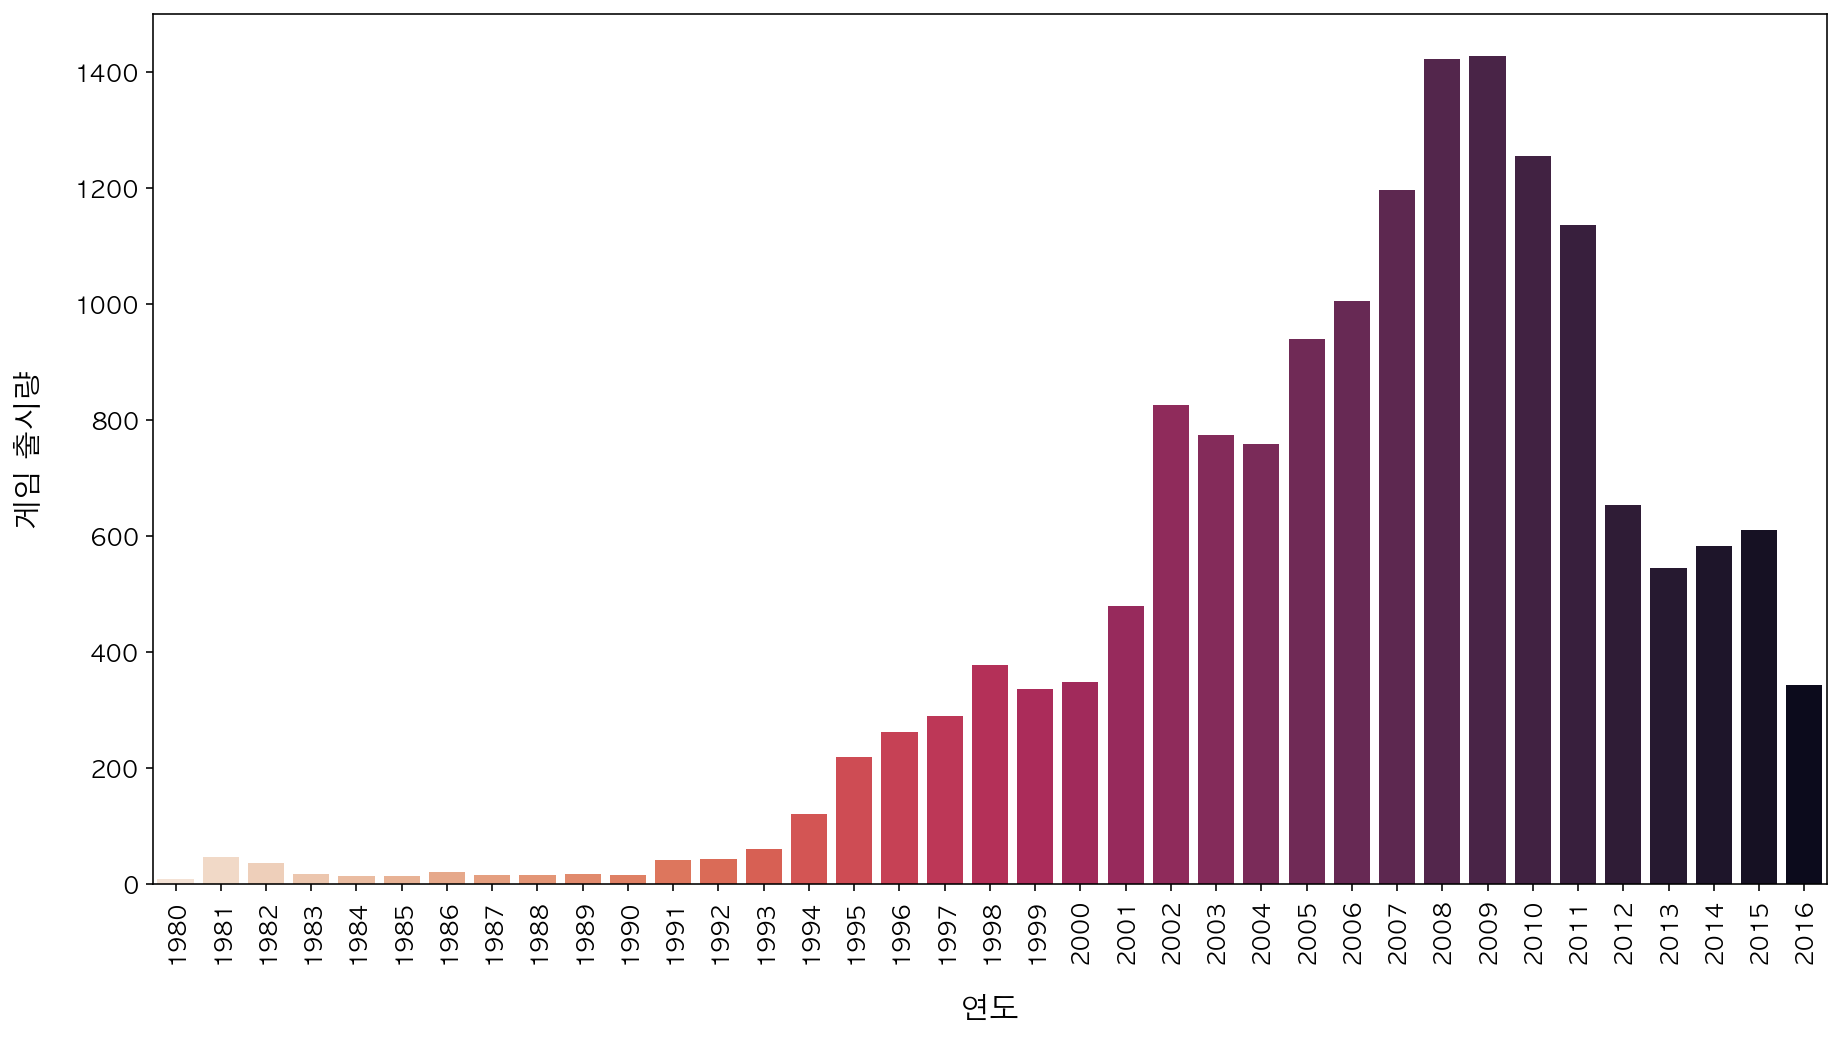

In [37]:
# 연도별 게임 출시량 - 시각화 
plt.figure(figsize=(15, 8))
sns_count = sns.countplot(x="Year", data=final_df, 
                        order = final_df.groupby(by=['Year'])['Name'].count().index, palette="rocket_r")
plt.xlabel("연도", fontsize=15, labelpad=15)
plt.ylabel("게임 출시량", fontsize=15, labelpad=15) 
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fig = sns_count.get_figure()
fig.savefig("s1_year_count.pdf") # pdf로 저장

In [38]:
# 연도별 게임 출고량 데이터 정리 
ysel = pd.DataFrame(final_df["Total_Sales"].groupby(by=final_df["Year"]).sum()).reset_index()

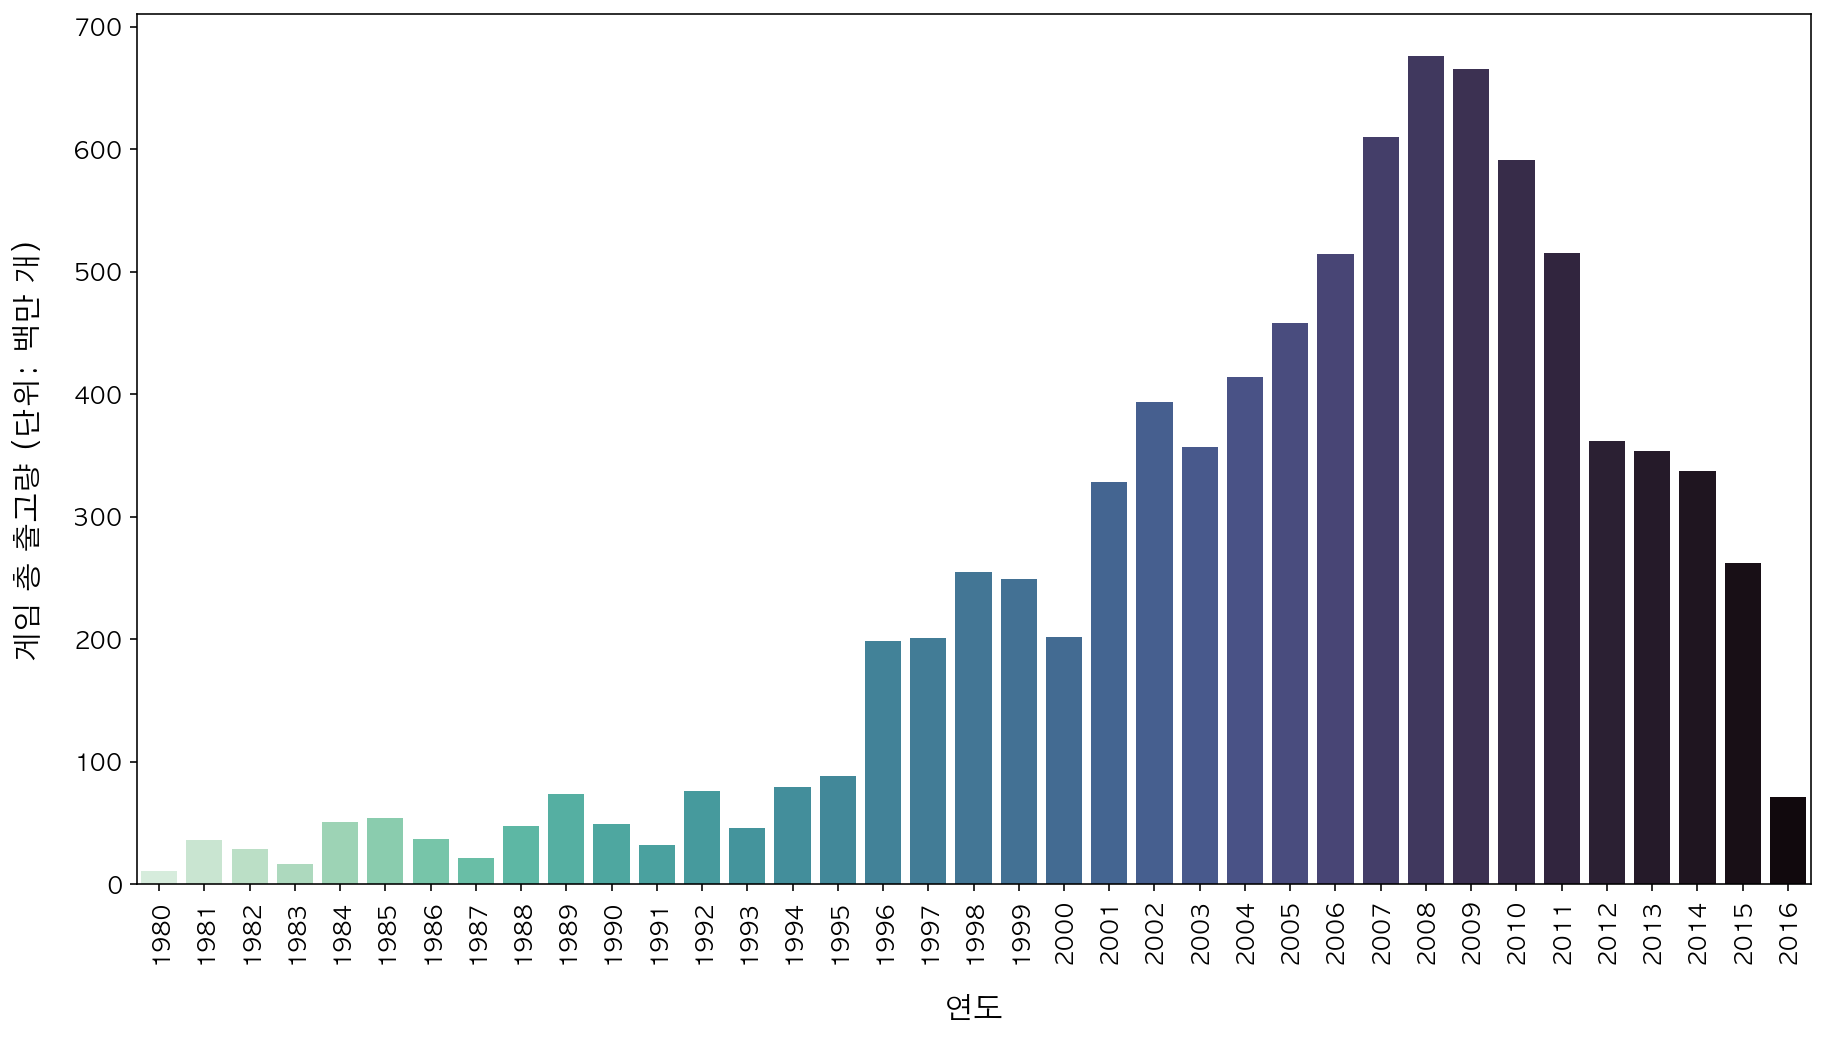

In [39]:
# 연도별 게임 총 출고량 - 시각화 
plt.figure(figsize=(15, 8))
sns_bar = sns.barplot(x="Year", y="Total_Sales", data=ysel, palette="mako_r")
plt.xlabel("연도", fontsize=15, labelpad=15)
plt.ylabel("게임 총 출고량 (단위: 백만 개)", fontsize=15, labelpad=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fig = sns_bar.get_figure()
fig.savefig("s1_year_sales.pdf") # pdf로 저장

In [40]:
# 2010년을 정점으로 비디오 게임의 출고량이 큰 폭으로 감소하고 있는 것을 알 수 있음. 
# 비디오 게임 산업이 하향세일 가능성과 최신 데이터가 업데이트되지 않았을 가능성을 모두 염두에 두고 추후 분석이 필요함. 

## 2.2. 연도별 지역별 변화

In [41]:
# 연도별 지역별 게임 총 출고량, 출고 점유율 
yrs = final_df[["Year",'NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Total_Sales']]
yrsales = yrs.groupby('Year').sum()
region = ["NA", "EU", "JP", "Other"]

for i in region: 
    yrsales[i+"_Share"] = (yrsales[f"{i}_Sales"] / yrsales["Total_Sales"])*100
    yrsales[i+"_Share"] = round(yrsales[i+"_Share"], 1)

yrsales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,NA_Share,EU_Share,JP_Share,Other_Share
Year,,,,,,,,,
1980,10.13,0.64,0.00,0.11,10.88,93.1,5.9,0.0,1.0
1981,33.40,1.96,0.00,0.32,35.68,93.6,5.5,0.0,0.9
1982,26.92,1.65,0.00,0.31,28.88,93.2,5.7,0.0,1.1
1983,7.76,0.80,8.10,0.14,16.80,46.2,4.8,48.2,0.8
1984,33.28,2.10,14.27,0.70,50.35,66.1,4.2,28.3,1.4
...,...,...,...,...,...,...,...,...,...
2012,154.61,118.26,51.64,37.60,362.11,42.7,32.7,14.3,10.4
2013,149.60,121.75,43.25,39.03,353.63,42.3,34.4,12.2,11.0
2014,131.97,125.65,39.46,40.02,337.10,39.1,37.3,11.7,11.9


In [42]:
# 연도별 지역별 총 출고량 
yrsales_only = yrsales.drop(['NA_Share', 'EU_Share', 'JP_Share', 'Other_Share'], axis=1)
yrsales_only.reset_index(inplace=True)
yrsales_only

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980,10.13,0.64,0.00,0.11,10.88
1,1981,33.40,1.96,0.00,0.32,35.68
2,1982,26.92,1.65,0.00,0.31,28.88
3,1983,7.76,0.80,8.10,0.14,16.80
4,1984,33.28,2.10,14.27,0.70,50.35
...,...,...,...,...,...,...
32,2012,154.61,118.26,51.64,37.60,362.11
33,2013,149.60,121.75,43.25,39.03,353.63
34,2014,131.97,125.65,39.46,40.02,337.10
35,2015,101.82,96.93,33.43,29.65,261.83


In [43]:
yrsales_stacked_pre = yrsales.drop(['Total_Sales', 'NA_Share', 'EU_Share', 'JP_Share', 'Other_Share'], axis=1)
yrsales_stacked = yrsales_stacked_pre.stack().reset_index()
yrsales_stacked.rename(columns={"level_1": 'Region', 0: "Sales"}, inplace=True)
yrsales_stacked

,Year,Region,Sales
0,1980,NA_Sales,10.13
1,1980,EU_Sales,0.64
2,1980,JP_Sales,0.00
3,1980,Other_Sales,0.11
4,1981,NA_Sales,33.40
...,...,...,...
143,2015,Other_Sales,29.65
144,2016,NA_Sales,22.66
145,2016,EU_Sales,26.76
146,2016,JP_Sales,13.70


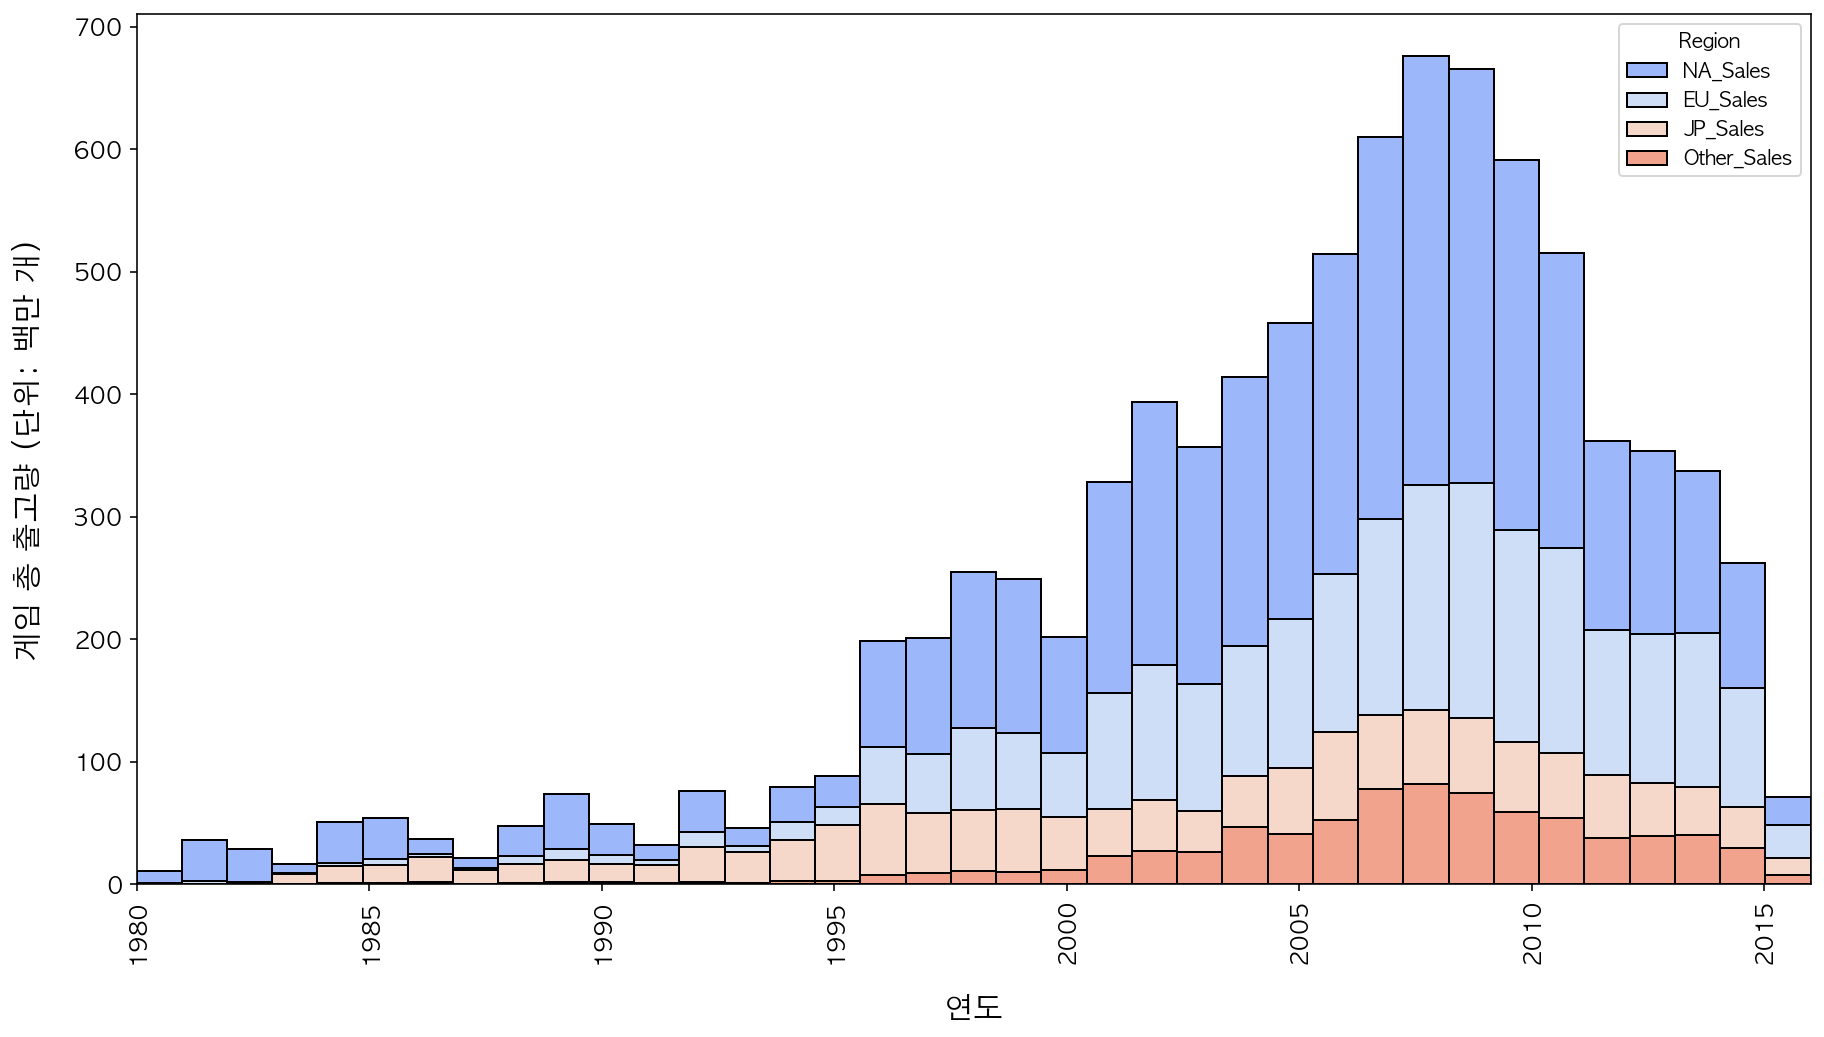

In [44]:
# 연도별 지역별 게임 총 출고량 - 시각화
plt.figure(figsize=(15, 8))
sns_stacked = sns.histplot(yrsales_stacked, x='Year', hue='Region', weights='Sales',
             multiple='stack', bins=len(years)-2, palette='coolwarm')
plt.xlabel("연도", fontsize=15, labelpad=15)
plt.ylabel("게임 총 출고량 (단위: 백만 개)", fontsize=15, labelpad=15)
plt.xlim(1980, 2016)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fig = sns_stacked.get_figure()
fig.savefig("s1_year_region_stacked_sales.pdf") # pdf로 저장

In [45]:
# 연도별 지역별 출고 점유율 
yrshare = yrsales.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Total_Sales'], axis=1)
yrshare 

,NA_Share,EU_Share,JP_Share,Other_Share
Year,,,,
1980,93.1,5.9,0.0,1.0
1981,93.6,5.5,0.0,0.9
1982,93.2,5.7,0.0,1.1
1983,46.2,4.8,48.2,0.8
1984,66.1,4.2,28.3,1.4
...,...,...,...,...
2012,42.7,32.7,14.3,10.4
2013,42.3,34.4,12.2,11.0
2014,39.1,37.3,11.7,11.9


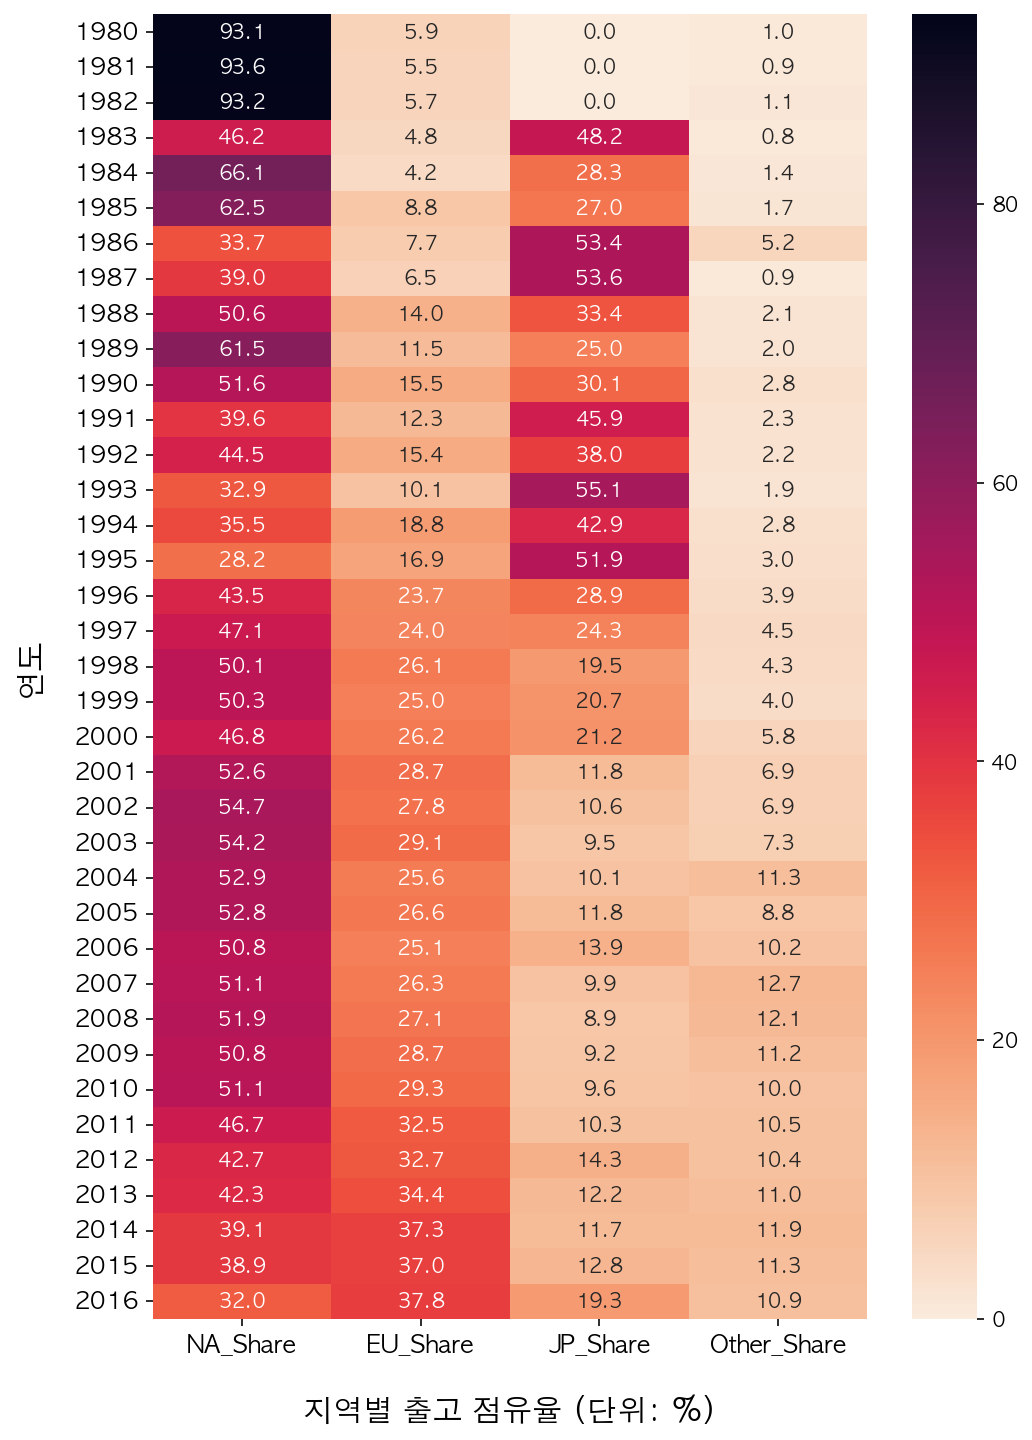

In [46]:
# 연도별 지역별 출고 점유율 - 시각화 
plt.figure(figsize=(8, 12))
sns_share = sns.heatmap(data=yrshare, cmap='rocket_r', annot=True, fmt=".1f", annot_kws={"size": 10})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("지역별 출고 점유율 (단위: %)", fontsize=15, labelpad=20)
plt.ylabel("연도", fontsize=15, labelpad=15)
plt.show()

fig = sns_share.get_figure()
fig.savefig("s1_year_region_share_sales.pdf") # pdf로 저장

## 2.3. 연도별 플랫폼별 변화

In [47]:
# 연도별 게임 플랫폼별 출시량 
yp = pd.DataFrame(final_df["Platform"].groupby(by=final_df["Year"]).value_counts())
ypcount = yp.stack().reset_index()
ypcount.rename(columns={0: "Release"}, inplace=True)
ypcount.drop(['level_2'], axis=1, inplace=True)
ypcount

,Year,Platform,Release
0,1980,Atari_2600,8
1,1981,Atari_2600,46
2,1982,Atari_2600,36
3,1983,Atari_2600,11
4,1983,NES,6
...,...,...,...
233,2016,PC,38
234,2016,3DS,35
235,2016,PS3,32
236,2016,WiiU,10


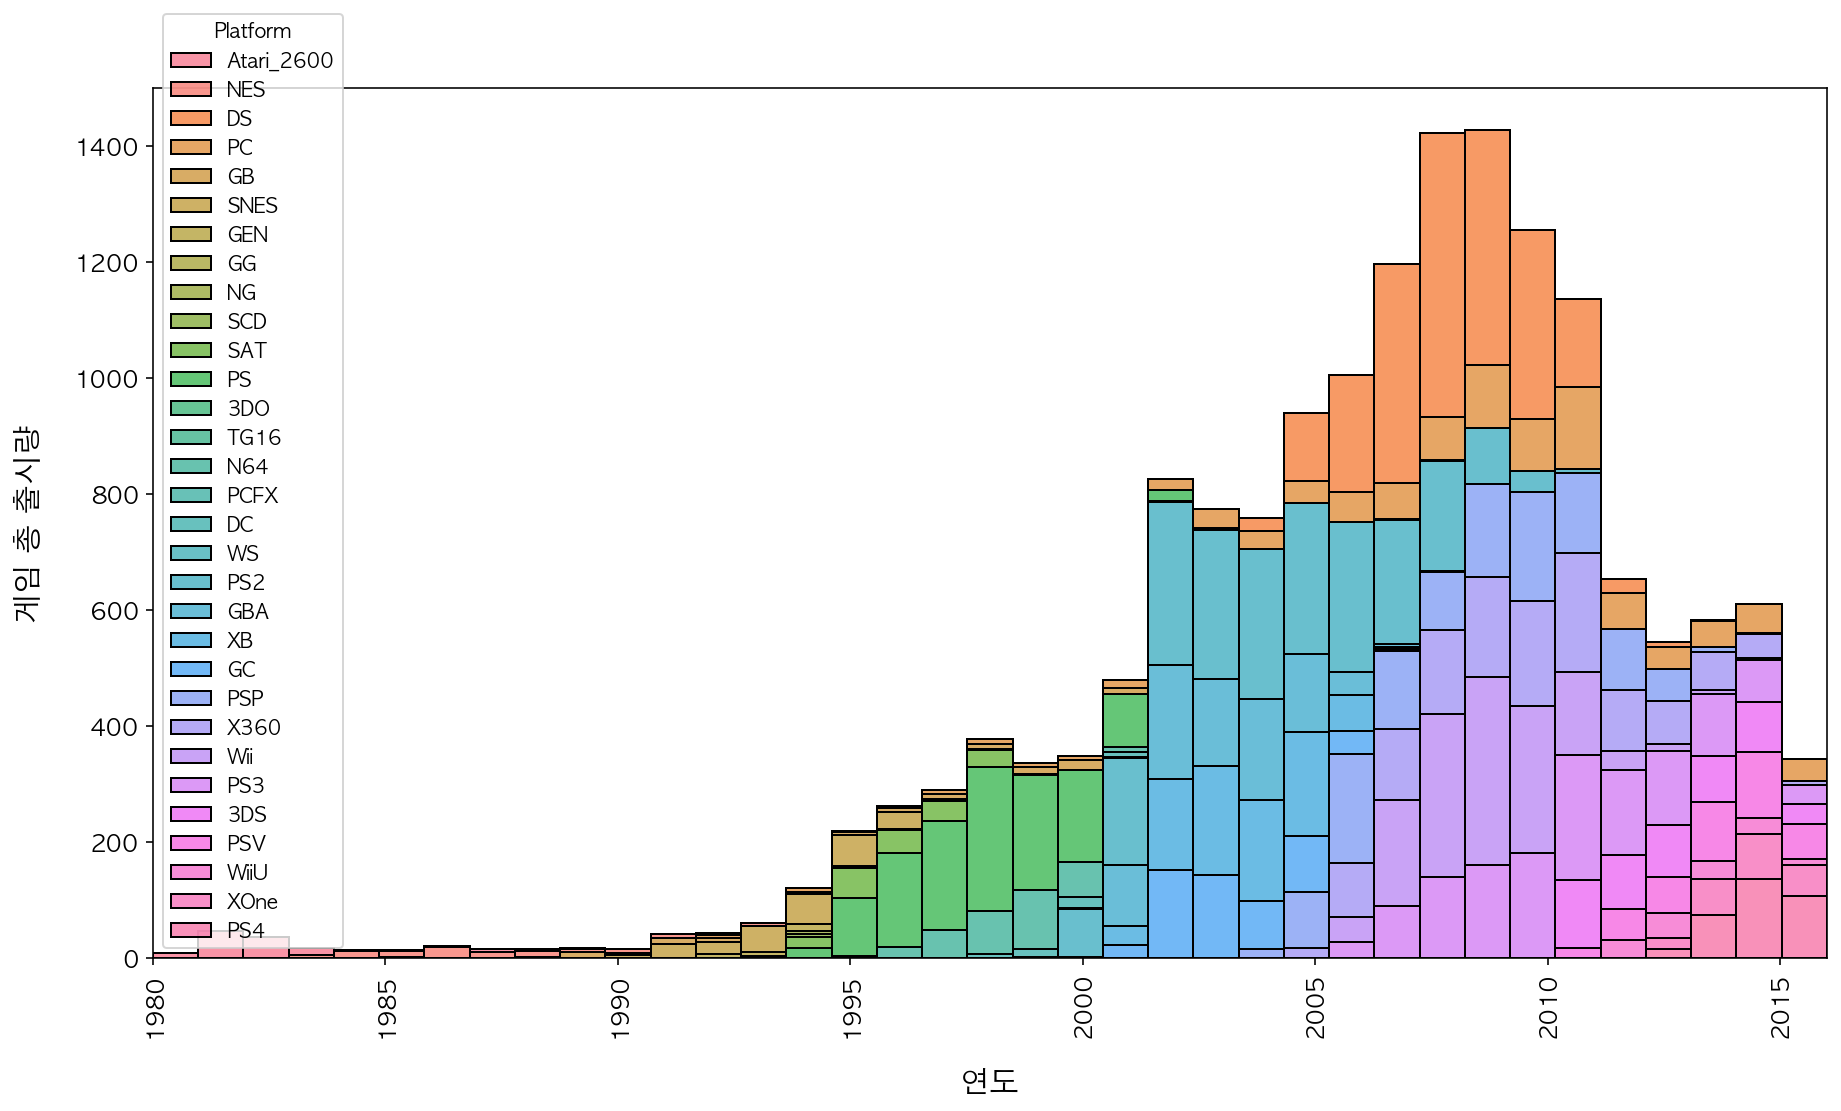

In [48]:
# 연도별 게임 플랫폼별 출시량 - 시각화
plt.figure(figsize=(15, 8))
sns_pstacked = sns.histplot(ypcount, x='Year', hue='Platform', weights='Release',
             multiple='stack', bins=len(years)-2)
plt.xlabel("연도", fontsize=15, labelpad=15)
plt.ylabel("게임 총 출시량", fontsize=15, labelpad=15)
plt.xlim(1980, 2016)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fig = sns_pstacked.get_figure()
fig.savefig("s1_year_plat_stacked_release.pdf") # pdf로 저장

In [49]:
# 플랫폼별 연도별 출시 점유율 
pyshare = pd.crosstab(final_df["Year"], final_df["Platform"]).apply(lambda r: (r/r.sum())*100, axis=1).T
pyshare["Share_diff"] = pyshare[2009] - pyshare[1980]
pyshare["Share_diff"].sort_values(ascending=False)

Platform
DS             28.361345
Wii            22.759104
X360           12.044818
PSP            11.274510
PS3            11.204482
PC              7.633053
PS2             6.722689
SAT             0.000000
PS4             0.000000
PSV             0.000000
3DO             0.000000
SCD             0.000000
SNES            0.000000
WS              0.000000
WiiU            0.000000
XB              0.000000
TG16            0.000000
PS              0.000000
3DS             0.000000
PCFX            0.000000
NG              0.000000
NES             0.000000
N64             0.000000
GG              0.000000
GEN             0.000000
GC              0.000000
GBA             0.000000
GB              0.000000
DC              0.000000
XOne            0.000000
Atari_2600   -100.000000
Name: Share_diff, dtype: float64

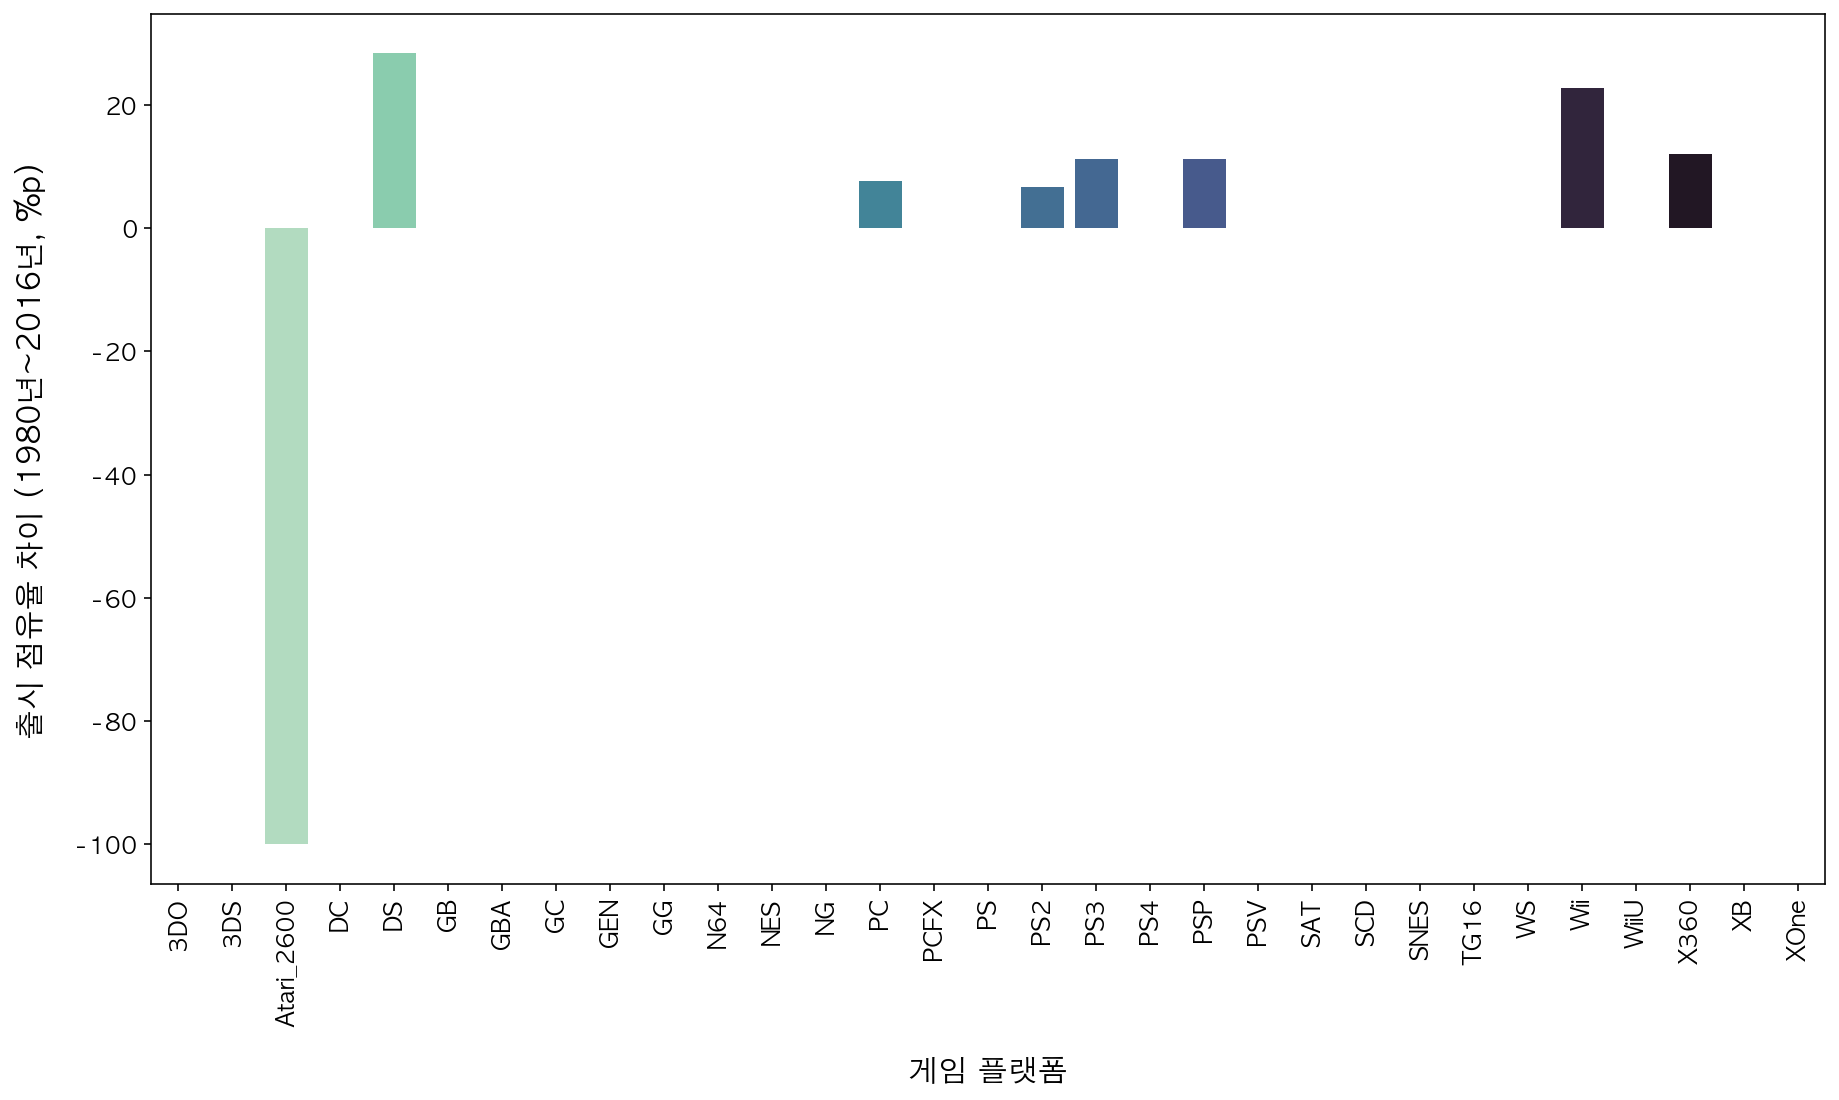

In [50]:
# 연도별 게임 플랫폼별 출시 점유율 변화 - 시각화
plt.figure(figsize=(15, 8))
sns_pdbar = sns.barplot(x=pyshare.index, y=pyshare["Share_diff"], palette="mako_r")
plt.xlabel("게임 플랫폼", fontsize=15, labelpad=15)
plt.ylabel("출시 점유율 차이 (1980년~2016년, %p)", fontsize=15, labelpad=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fig = sns_pdbar.get_figure()
fig.savefig("s1_plat_share_diff.pdf") # pdf로 저장

## 2.4. 연도별 장르별 변화

In [51]:
# 연도별 게임 장르별 출시량 
yr = pd.DataFrame(final_df["Genre"].groupby(by=final_df["Year"]).value_counts())
ygcount = yr.stack().reset_index()
ygcount.rename(columns={0: "Release"}, inplace=True)
ygcount.drop(['level_2'], axis=1, inplace=True)
ygcount

,Year,Genre,Release
0,1980,Misc,4
1,1980,Shooter,2
2,1980,Action,1
3,1980,Fighting,1
4,1981,Action,25
...,...,...,...
380,2016,Misc,18
381,2016,Fighting,14
382,2016,Platform,10
383,2016,Strategy,10


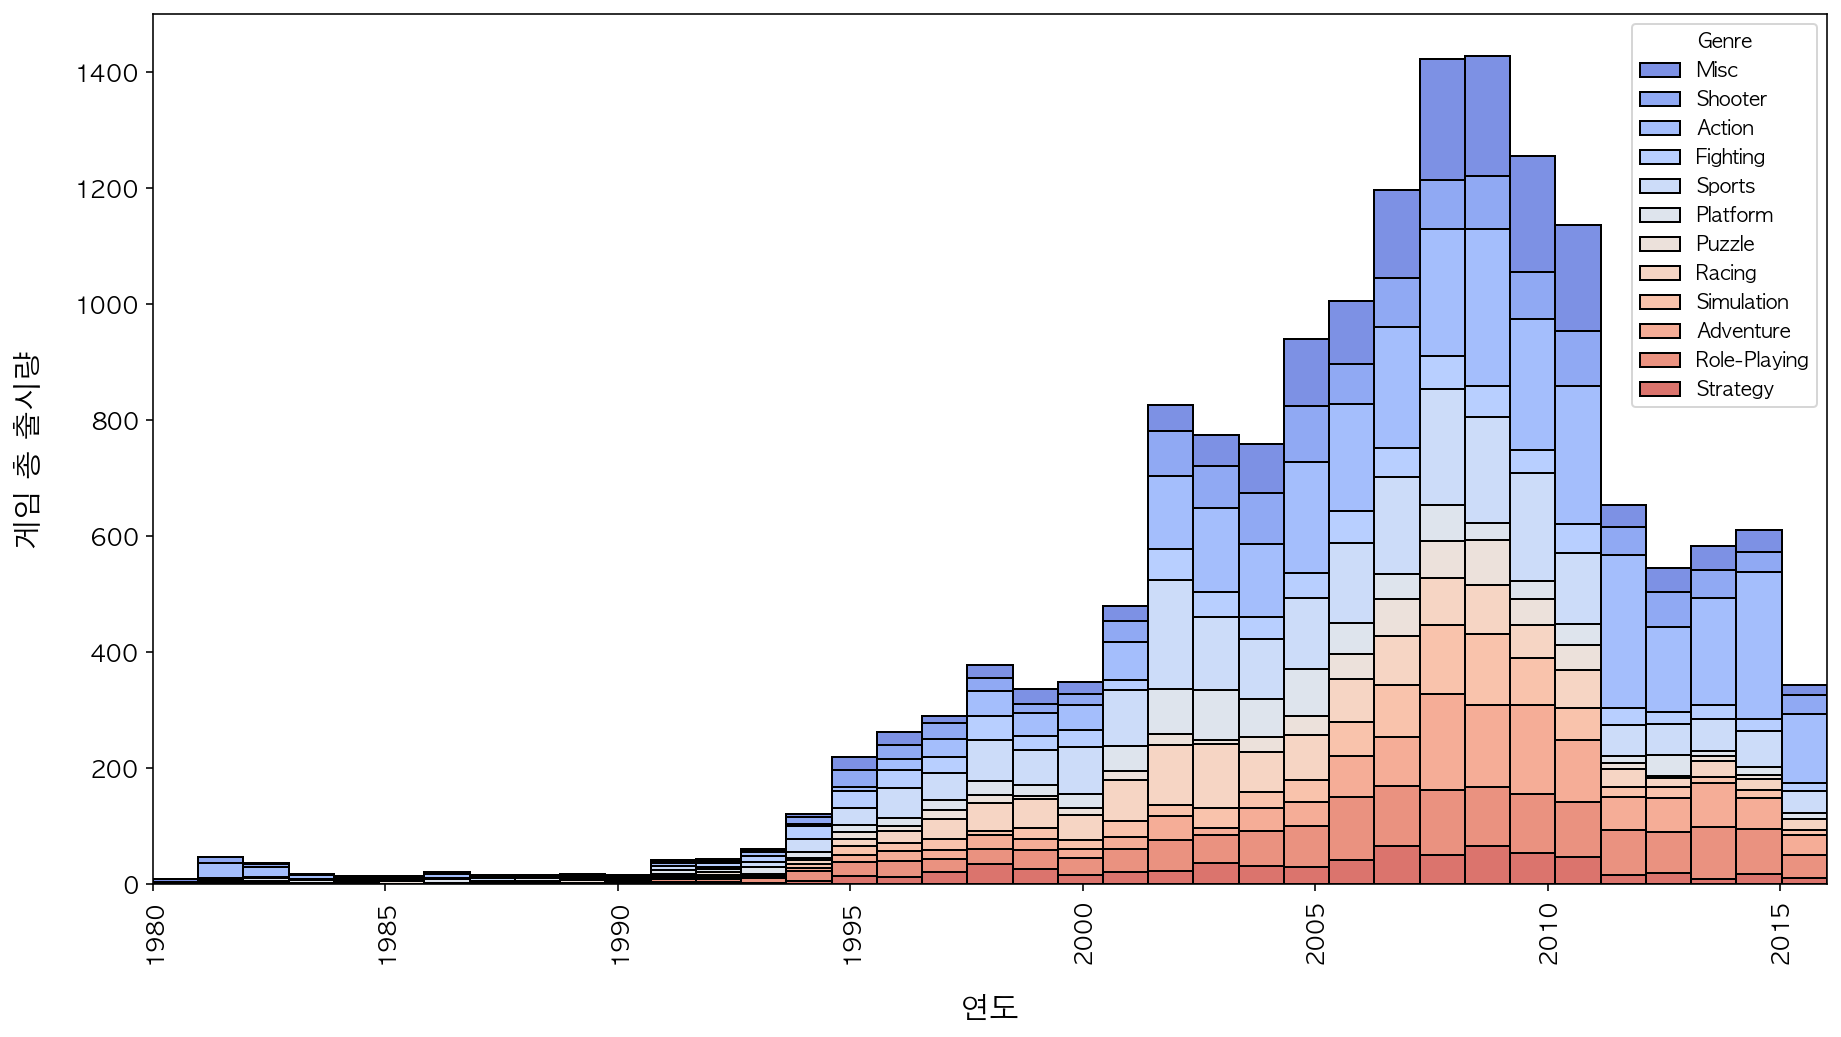

In [52]:
# 연도별 게임 장르별 출시량 - 시각화
plt.figure(figsize=(15, 8))
sns_gstacked = sns.histplot(ygcount, x='Year', hue='Genre', weights='Release',
             multiple='stack', bins=len(years)-2, palette='coolwarm')
plt.xlabel("연도", fontsize=15, labelpad=15)
plt.ylabel("게임 총 출시량", fontsize=15, labelpad=15)
plt.xlim(1980, 2016)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fig = sns_gstacked.get_figure()
fig.savefig("s1_year_genre_stacked_release.pdf") # pdf로 저장

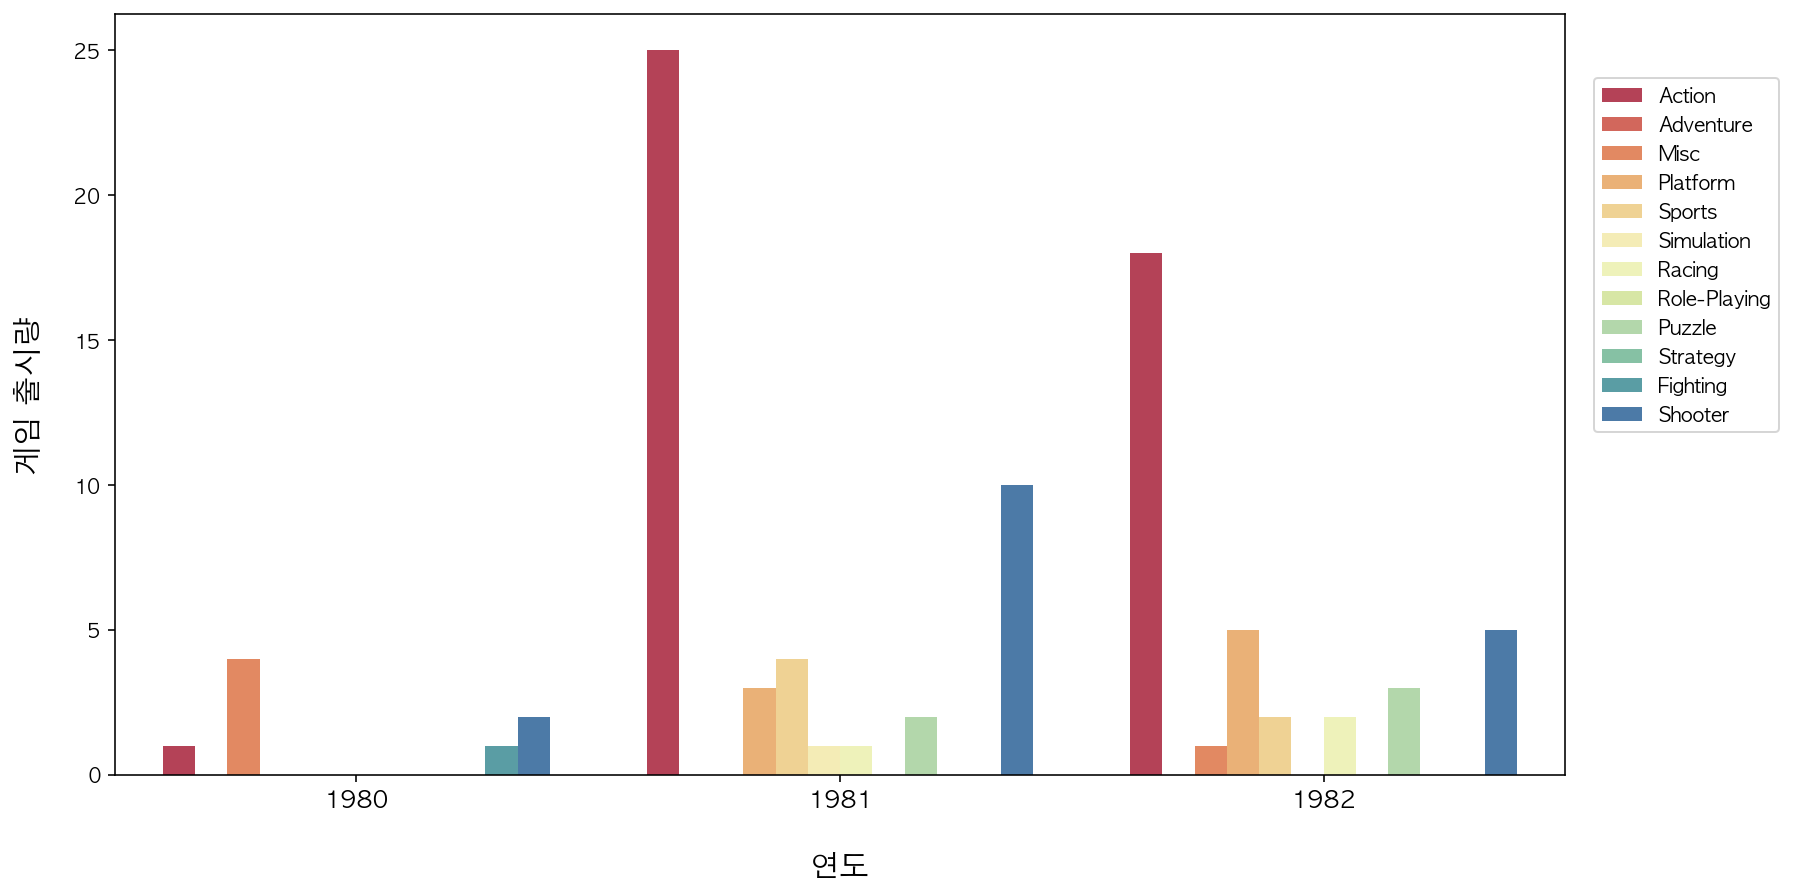

In [53]:
# 1980년대 3개년의 장르별 출시량 
plt.figure(figsize=(13, 7))
sns_yrold3 = sns.countplot(x="Year", data=final_df, hue='Genre', order=sorted(final_df.Year.unique())[:3], 
            palette="Spectral")
plt.xticks(size=12)
plt.xlabel("연도", fontsize=15,labelpad=20)
plt.ylabel("게임 출시량", fontsize=15,labelpad=15)
plt.legend(loc=(1.02, 0.45))
plt.show()

fig = sns_yrold3.get_figure()
fig.savefig("s1_year_genre_old3.pdf") # pdf로 저장

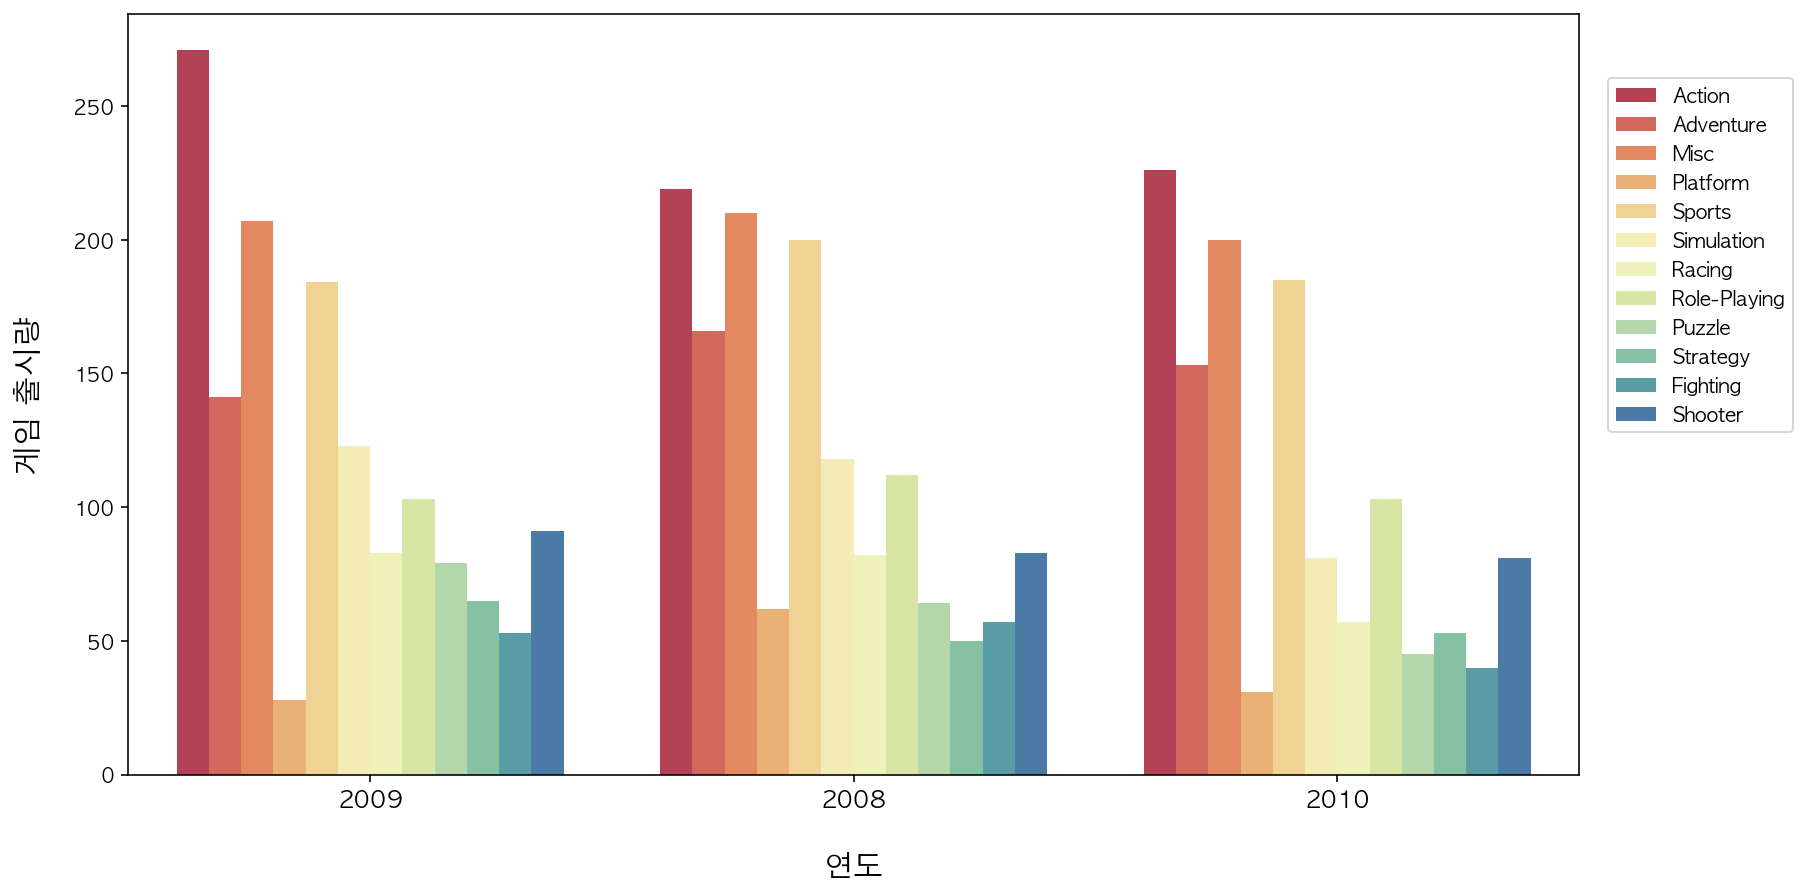

In [54]:
# 게임 출시량이 가장 많았던 3개년의 장르별 출시량 
plt.figure(figsize=(13, 7))
sns_yrhigh3 = sns.countplot(x="Year", data=final_df, hue='Genre', order=final_df.Year.value_counts().iloc[:3].index, 
            palette="Spectral")
plt.xticks(size=12)
plt.xlabel("연도", fontsize=15,labelpad=20)
plt.ylabel("게임 출시량", fontsize=15,labelpad=15)
plt.legend(loc=(1.02, 0.45))

plt.show()

fig = sns_yrhigh3.get_figure()
fig.savefig("s1_year_genre_high3.pdf") # pdf로 저장

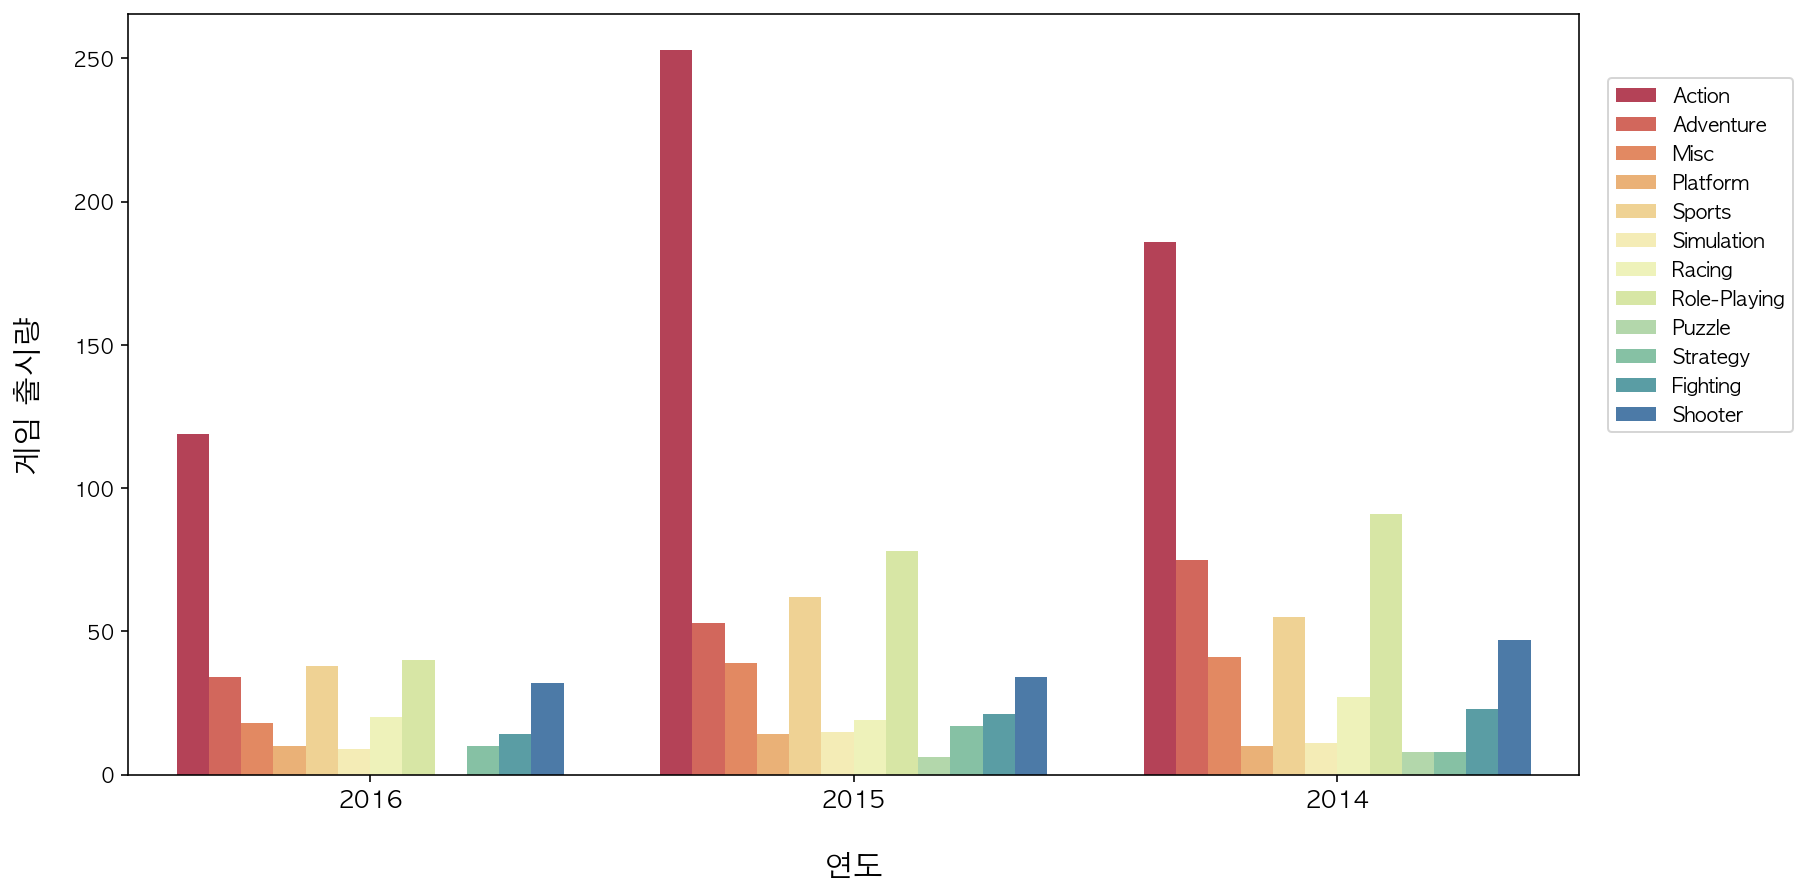

In [55]:
# 최근 3개년의 장르별 출시량 
plt.figure(figsize=(13, 7))
sns_yrnew3 = sns.countplot(x="Year", data=final_df, hue='Genre', order=sorted(final_df.Year.unique(), reverse=True)[:3], 
            palette="Spectral")
plt.xticks(size=12)
plt.xlabel("연도", fontsize=15,labelpad=20)
plt.ylabel("게임 출시량", fontsize=15,labelpad=15)
plt.legend(loc=(1.02, 0.45))

plt.show()

fig = sns_yrnew3.get_figure()
fig.savefig("s1_year_genre_new3.pdf") # pdf로 저장

# Part 3. 지역별 선호 비디오 게임 장르

In [56]:
# 지역별 인기 게임 장르 (총 출고액)(단위: 백만 개)
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']
final_df.groupby(by=['Genre'])[sales].sum().sort_values(by='Total_Sales', ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,858.78,513.64,156.60,183.99,1713.01
Sports,667.26,370.97,134.76,132.35,1305.34
Shooter,574.48,310.23,38.18,101.86,1024.75
Role-Playing,318.76,183.10,342.89,56.73,901.48
Platform,445.38,200.65,130.53,51.45,828.01
...,...,...,...,...,...
Fighting,220.35,99.90,87.14,36.15,443.54
Simulation,181.16,113.17,63.54,31.30,389.17
Puzzle,121.58,50.48,56.24,12.44,240.74


In [57]:
# 지역별 인기 게임 장르 (평균 출고액, 표준편차, 최소 출고액, 최대 출고액)(단위: 백만 개)
function_list = ['count', 'sum', 'mean', 'std', 'min', 'max']
final_df.groupby(by=['Genre'])[sales].agg(function_list)

NA_Sales                                         EU_Sales  \
                count     sum      mean       std  min    max    count   
Genre                                                                    
Action           3241  858.78  0.264974  0.571010  0.0   9.63     3241   
Adventure        1270  101.92  0.080252  0.268278  0.0   6.16     1270   
Fighting          835  220.35  0.263892  0.517588  0.0   6.75      835   
Misc             1705  400.29  0.234774  0.694129  0.0  14.97     1705   
Platform          874  445.38  0.509588  1.511506  0.0  29.08      874   
Puzzle            567  121.58  0.214427  1.071341  0.0  23.20      567   
Racing           1220  354.70  0.290738  0.749859  0.0  15.85     1220   
Role-Playing     1464  318.76  0.217732  0.663835  0.0  11.27     1464   
Shooter          1280  574.48  0.448813  1.212672  0.0  26.93     1280   
Simulation        848  181.16  0.213632  0.471425  0.0   9.07      848   
Sports           2299  667.26  0.290239  1.047689  0.0  41.49     2299   
Strategy          670   67.89  0.101328  0.300922  0.0   3.18      670   

                                          ... Other_Sales                 \
                 sum      mean       std  ...        mean       std  min   
Genre                                     ...                              
Action        513.64  0.158482  0.410832  ...    0.056770  0.242251  0.0   
Adventure      63.71  0.050165  0.177466  ...    0.013150  0.044939  0.0   
Fighting       99.90  0.119641  0.252813  ...    0.043293  0.105528  0.0   
Misc          210.20  0.123284  0.442941  ...    0.042663  0.143101  0.0   
Platform      200.65  0.229577  0.592074  ...    0.058867  0.167185  0.0   
Puzzle         50.48  0.089030  0.322534  ...    0.021940  0.071734  0.0   
Racing        235.03  0.192648  0.587281  ...    0.062713  0.274215  0.0   
Role-Playing  183.10  0.125068  0.481787  ...    0.038750  0.116355  0.0   
Shooter       310.23  0.242367  0.554307  ...    0.079578  0.201495  0.0   
Simulation    113.17  0.133455  0.519490  ...    0.036910  0.118366  0.0   
Sports        370.97  0.161361  0.783081  ...    0.057569  0.245722  0.0   
Strategy       44.92  0.067045  0.194049  ...    0.016761  0.041487  0.0   

                    Total_Sales                                            
                max       count      sum      mean       std   min    max  
Genre                                                                      
Action        10.57        3241  1713.01  0.528544  1.165859  0.01  21.39  
Adventure      0.83        1270   234.22  0.184425  0.511711  0.01  11.18  
Fighting       1.41         835   443.54  0.531186  0.958384  0.01  13.04  
Misc           2.85        1705   787.41  0.461824  1.310917  0.01  29.01  
Platform       2.90         874   828.01  0.947380  2.601607  0.01  40.24  
Puzzle         1.18         567   240.74  0.424586  1.581584  0.01  30.26  
Racing         7.53        1220   722.56  0.592262  1.680373  0.00  35.83  
Role-Playing   1.51        1464   901.48  0.615765  1.676799  0.01  31.38  
Shooter        2.52        1280  1024.75  0.800586  1.835254  0.01  28.31  
Simulation     2.75         848   389.17  0.458927  1.207531  0.01  24.75  
Sports         8.46        2299  1305.34  0.567786  2.107221  0.01  82.74  
Strategy       0.59         670   173.14  0.258418  0.524674  0.01   5.45  

[12 rows x 30 columns]

In [58]:
# 지역별 인기 게임 장르 (출고 점유율)
gs = final_df.groupby(by=['Genre'])[sales].sum()
ss = final_df[sales].sum()
Sales_pcts_by_genre = round((gs / ss)*100, 1)
Sales_pcts_by_genre = Sales_pcts_by_genre.sort_values(by="Total_Sales", ascending=False)
Sales_pcts_by_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,19.9,21.4,12.3,23.5,19.5
Sports,15.5,15.5,10.6,16.9,14.9
Shooter,13.3,12.9,3.0,13.0,11.7
Role-Playing,7.4,7.6,27.0,7.2,10.3
Platform,10.3,8.4,10.3,6.6,9.4
...,...,...,...,...,...
Fighting,5.1,4.2,6.9,4.6,5.1
Simulation,4.2,4.7,5.0,4.0,4.4
Adventure,2.4,2.7,4.1,2.1,2.7


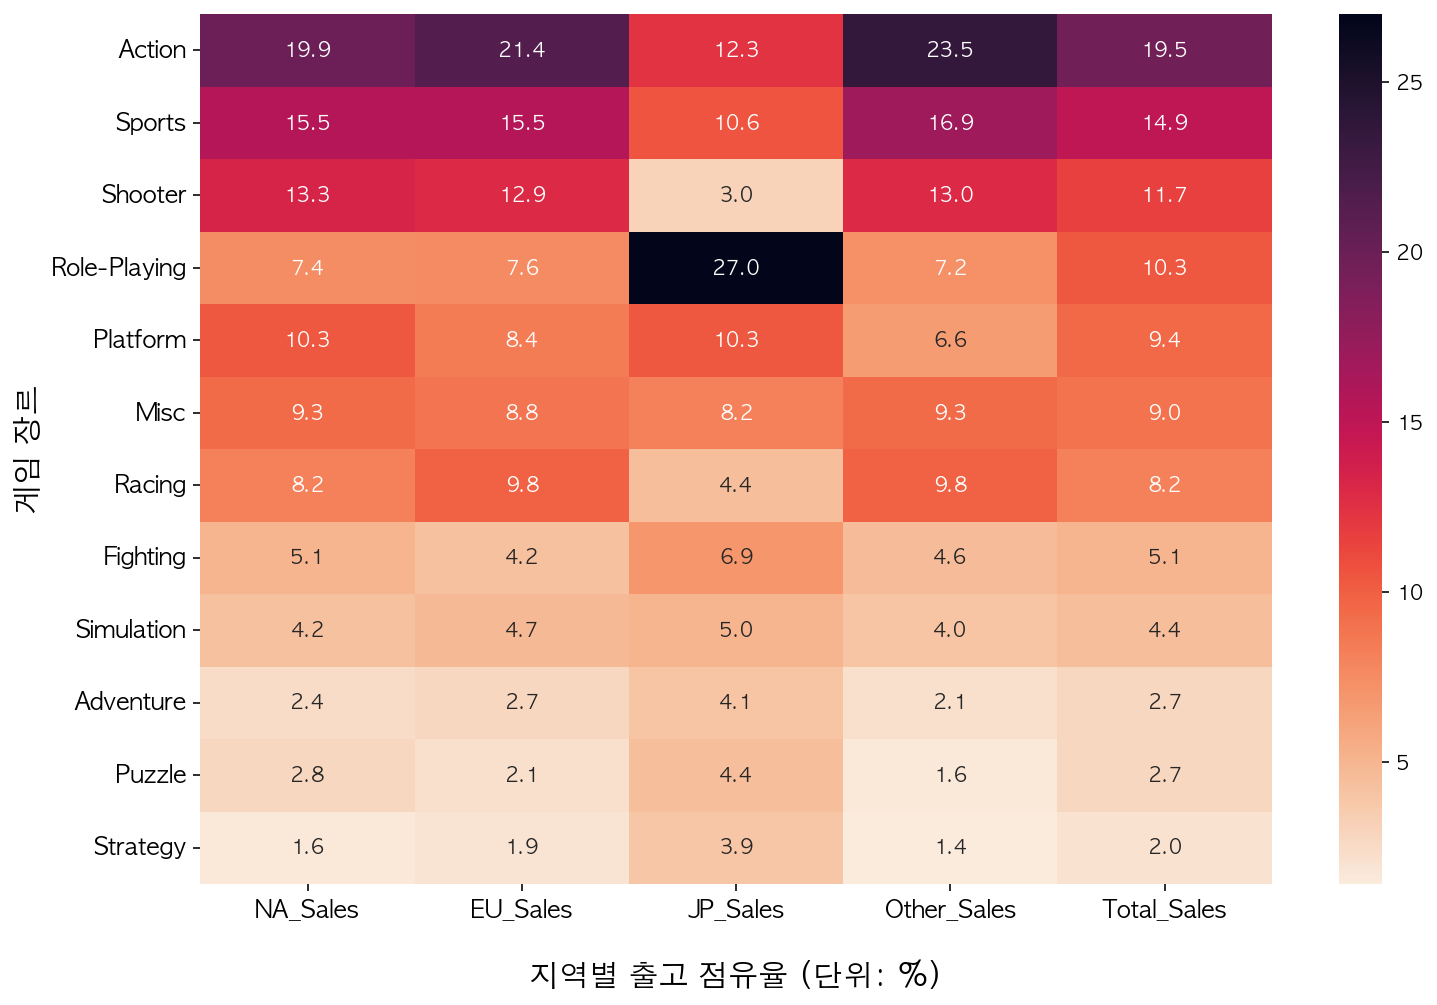

In [59]:
plt.figure(figsize=(12, 8))
sns_rgshare = sns.heatmap(data=Sales_pcts_by_genre, cmap='rocket_r', annot=True, fmt=".1f", annot_kws={"size": 10})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("지역별 출고 점유율 (단위: %)", fontsize=15, labelpad=20)
plt.ylabel("게임 장르", fontsize=15)
plt.show()

fig = sns_rgshare.get_figure()
fig.savefig("s1_region_genre_share.pdf") # pdf로 저장

# Part 4. 출고량 높은 비디오 게임 분석 

In [60]:
final_df["Total_Sales"].describe()

count    16273.000000
mean         0.538522
std          1.562466
min          0.000000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Total_Sales, dtype: float64

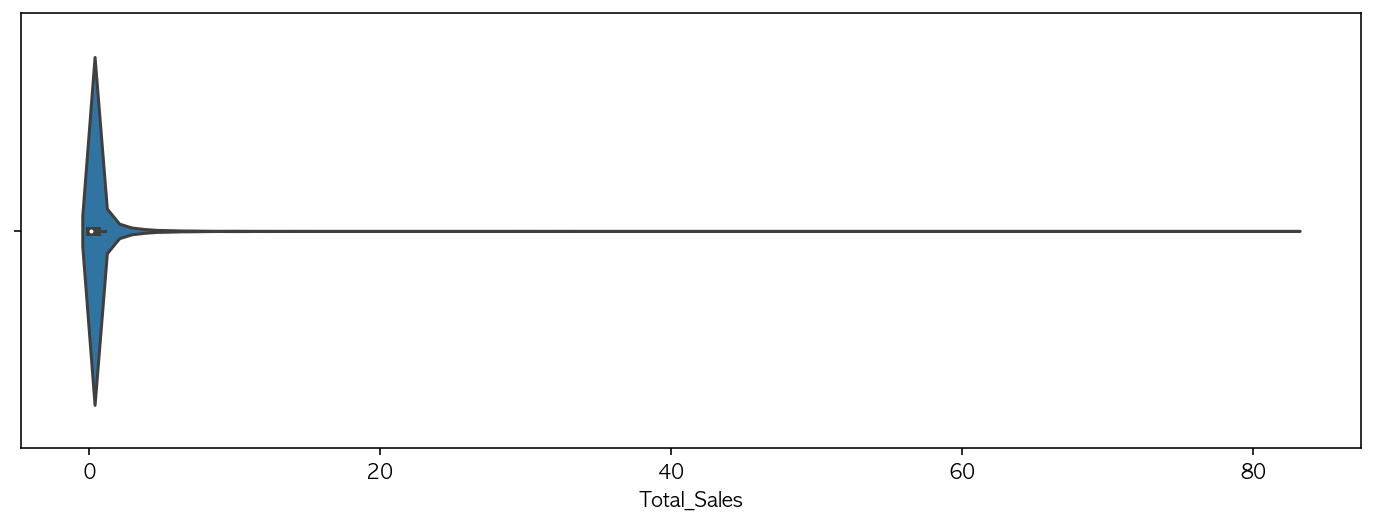

In [61]:
plt.figure(figsize=(12, 4))
sns.violinplot(final_df["Total_Sales"]);

In [62]:
# 출고량이 높은 게임 기준 마련으로 위한 백분율 값 확인 
final_df["Total_Sales"].quantile([.90, .95, .99, .995, .999])


0.900     1.21000
0.950     2.04000
0.990     5.43560
0.995     8.10280
0.999    21.23224
Name: Total_Sales, dtype: float64

In [63]:
# 상위 1%를 기준으로 삼기로 결정함(즉, 총 출고량이 543만 개 이상인 비디오 게임)
final_df["Top_Selling"] = np.where(final_df["Total_Sales"] >= 5.43560, 1, 0)
final_df["Top_Selling"].sum()

163

In [64]:
# 상위 1% vs. 99% 게임 지역별 총 출고량, 출고 점유율 
trs = final_df[["Top_Selling",'NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Total_Sales']]
trsales = trs.groupby('Top_Selling').sum()
region = ["NA", "EU", "JP", "Other"]

for i in region: 
    trsales[i+"_Share"] = (trsales[f"{i}_Sales"] / trsales["Total_Sales"])*100
    trsales[i+"_Share"] = round(trsales[i+"_Share"], 1)

trsales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,NA_Share,EU_Share,JP_Share,Other_Share
Top_Selling,,,,,,,,,
0,3421.59,1848.59,1026.65,614.47,6911.30,49.5,26.7,14.9,8.9
1,890.96,547.41,244.72,168.98,1852.07,48.1,29.6,13.2,9.1


In [65]:
# 상위 1%의 출고 점유율 
round((1852.07 / (1852.07+6911.30))*100, 1)

21.1

In [66]:
top_selling = final_df.query('Top_Selling ==1')
top_selling.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Top_Selling
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.0
mean,2005.030675,5.466012,3.358344,1.501350,1.036687,11.362393,1.0
std,7.358059,5.044697,3.002805,1.809354,1.293946,8.773435,0.0
min,1982.000000,0.070000,0.010000,0.000000,0.000000,5.450000,1.0
25%,2001.000000,2.940000,1.885000,0.130000,0.425000,6.600000,1.0
50%,2007.000000,4.020000,2.630000,0.830000,0.730000,8.110000,1.0
75%,2010.500000,6.110000,3.815000,2.500000,1.150000,12.245000,1.0
max,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000,1.0


In [67]:
top_selling.describe(include="object")

,Name,Platform,Genre
count,163,163,163
unique,147,21,12
top,Grand_Theft_Auto_V,X360,Shooter
freq,3,24,32


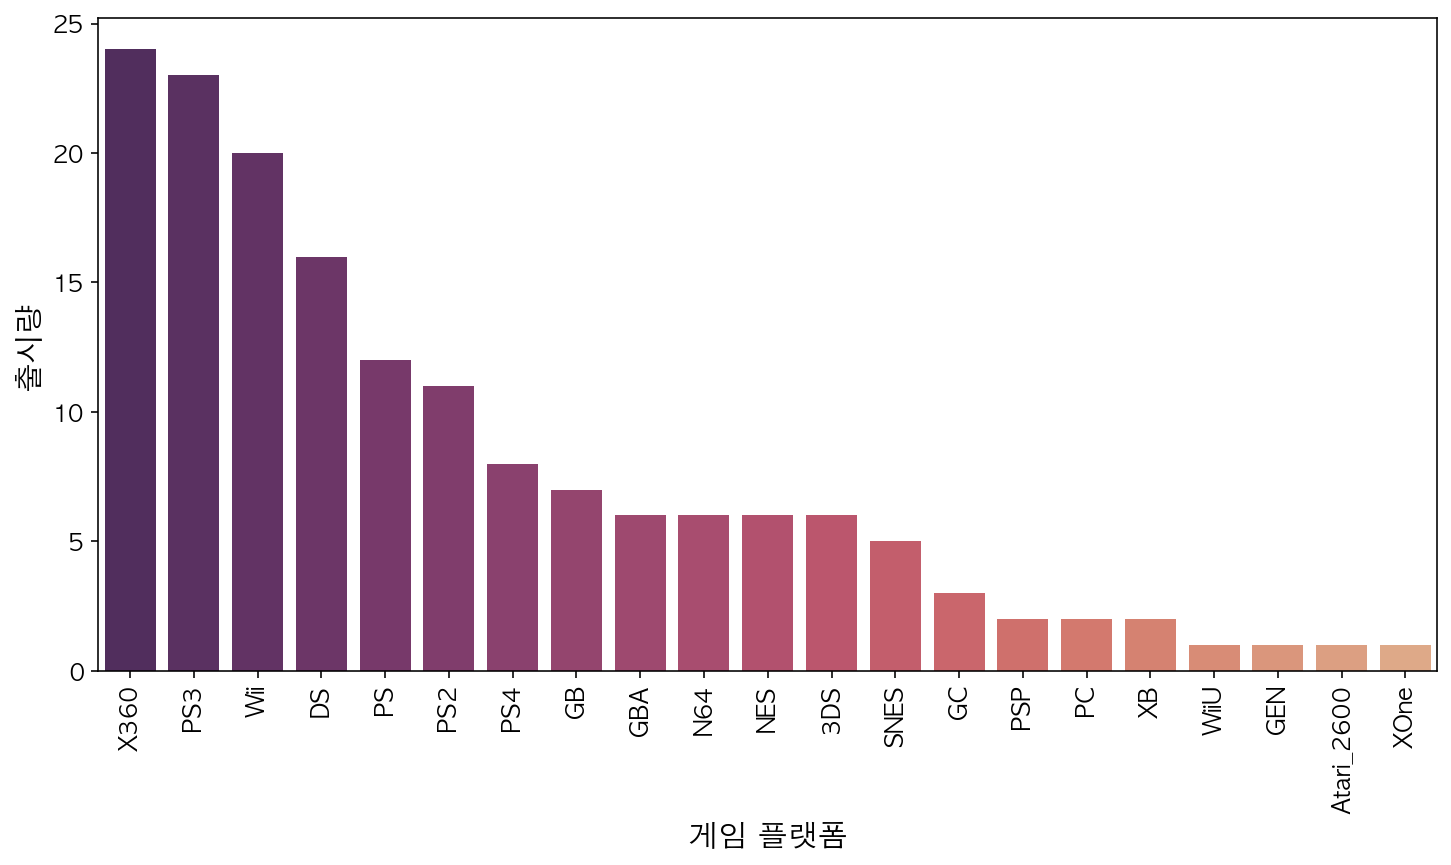

In [68]:
# 상위 1% 게임 플랫폼별 분포
plt.figure(figsize=(12, 6))
sns_top = sns.countplot(x="Platform", data=top_selling, 
                        order = top_selling['Platform'].value_counts().index, palette="flare_r")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("게임 플랫폼", fontsize=15)
plt.ylabel("출시량", fontsize=15)
plt.show()

fig = sns_top.get_figure()
fig.savefig("s1_top1_platform.pdf") # pdf로 저장

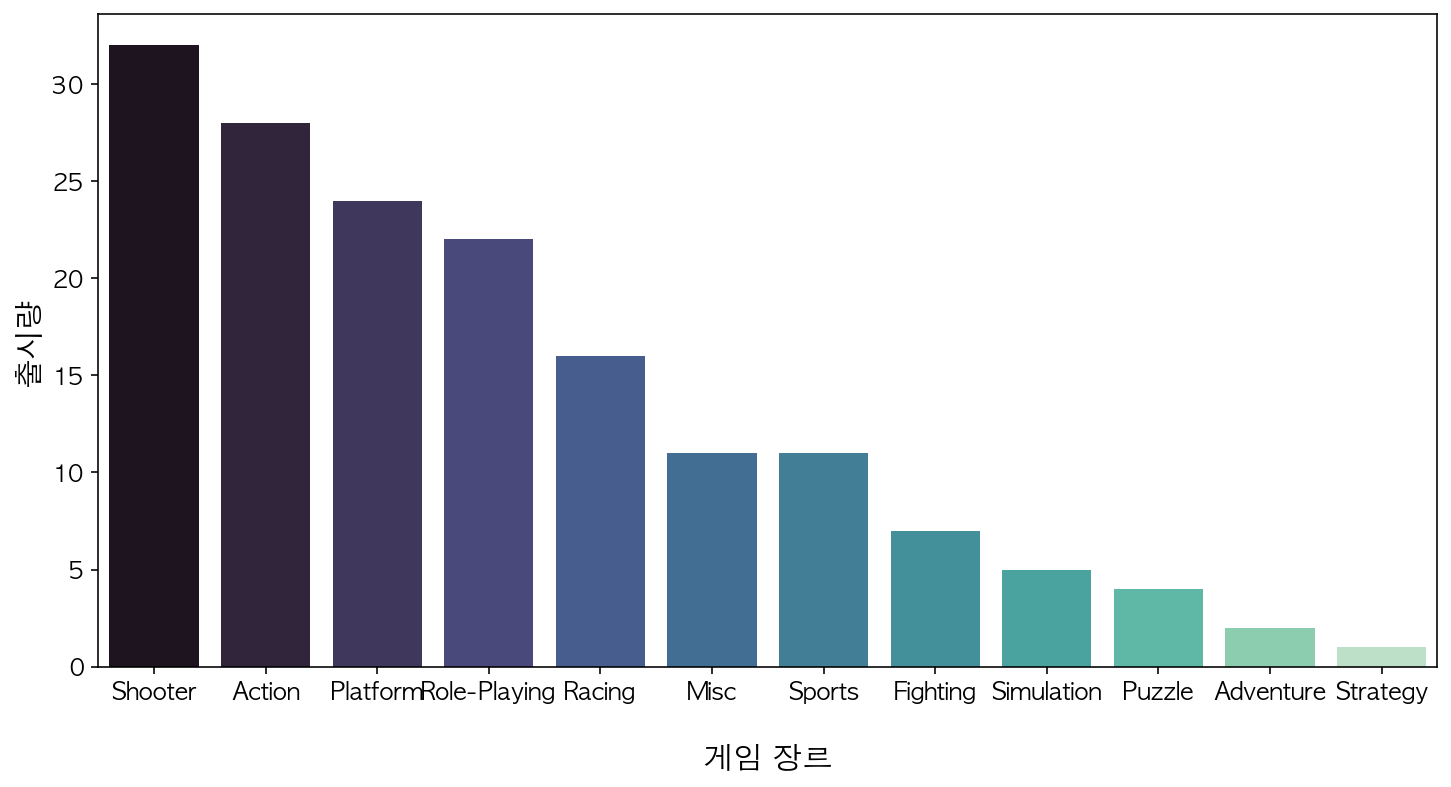

In [69]:
# 상위 1% 게임 장르별 분포
plt.figure(figsize=(12, 6))
sns_top = sns.countplot(x="Genre", data=top_selling, 
                        order = top_selling['Genre'].value_counts().index, palette="mako")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("게임 장르", fontsize=15, labelpad=20)
plt.ylabel("출시량", fontsize=15)
plt.show()

fig = sns_top.get_figure()
fig.savefig("s1_top1_genre.pdf") # pdf로 저장

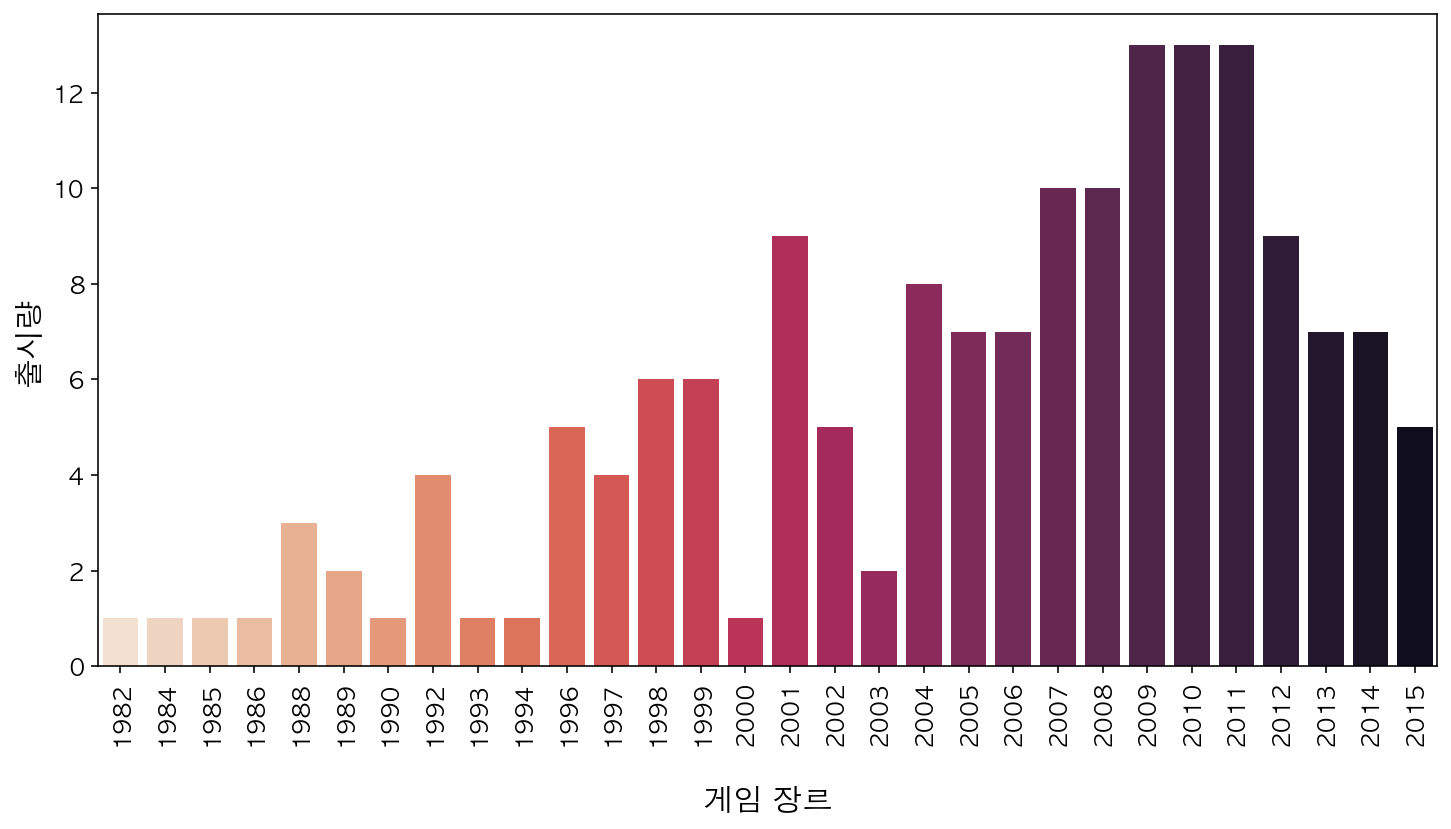

In [70]:
# 상위 1% 게임 출시연도 분포
plt.figure(figsize=(12, 6))
sns_top = sns.countplot(x="Year", data=top_selling, 
                        order =top_selling['Year'].value_counts().sort_index(ascending=True).index, 
                        palette="rocket_r")
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("게임 장르", fontsize=15, labelpad=20)
plt.ylabel("출시량", fontsize=15)
plt.show()

fig = sns_top.get_figure()
fig.savefig("s1_top1_year.pdf") # pdf로 저장

In [71]:
# 역대 가장 출고량이 높은 게임 - Wii Sports(2006년 출시)
final_df.query('Total_Sales > 80')

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Top_Selling
2860,Wii_Sports,Wii,2006,Sports,41.49,29.02,3.77,8.46,82.74,1


In [72]:
# 역대 가장 출고량이 두번째로 높은 게임 - Super_Mario_Bros(1985년 출시)
final_df.query('40 < Total_Sales < 50')

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Top_Selling
4120,Super_Mario_Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,1


# Part 5. 비디오 게임 군집화: 지역별 출고량 분석 

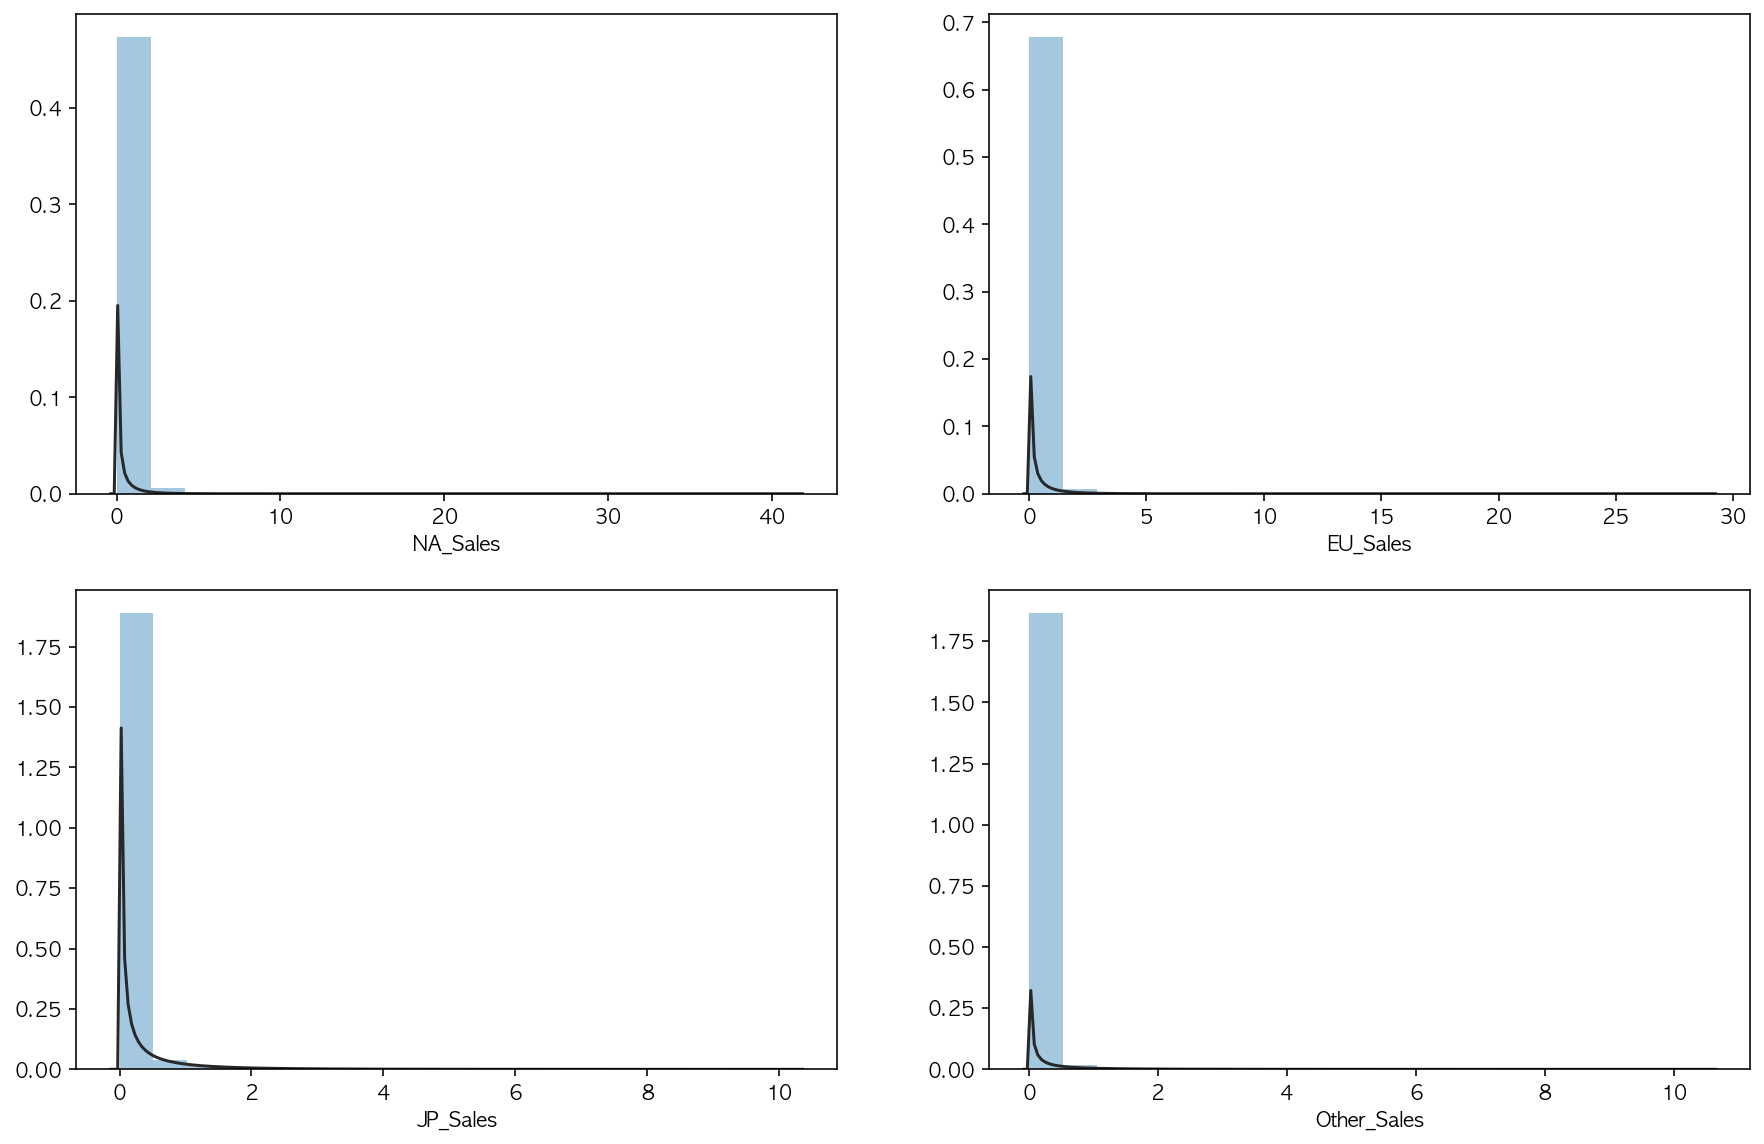

In [73]:
# 지역별 출고량 히스토그램 
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

plt.figure(figsize=(15,15))
for i, column in enumerate(sales):
    plt.subplot(3,2,i+1)
    sns.distplot(final_df[column], bins=20, kde=False, fit=stats.gamma)

In [74]:
final_df.reset_index(drop=True, inplace=True)

In [75]:
features = final_df[sales]
features

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04
...,...,...,...,...
16268,0.15,0.04,0.00,0.01
16269,0.01,0.00,0.00,0.00
16270,0.44,0.19,0.03,0.13
16271,0.05,0.05,0.25,0.03


In [76]:
# 데이터 표준화 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("Data: \n", features)

# StandardScaler()를 사용하여 데이터 표준화 
scaler = StandardScaler()
Z = scaler.fit_transform(features)
print("\n Standardized Data: \n", Z)



Data: 
        NA_Sales  EU_Sales  JP_Sales  Other_Sales
0          0.04      0.00      0.00         0.00
1          0.17      0.00      0.00         0.01
2          0.00      0.00      0.02         0.00
3          0.04      0.00      0.00         0.00
4          0.12      0.09      0.00         0.04
...         ...       ...       ...          ...
16268      0.15      0.04      0.00         0.01
16269      0.01      0.00      0.00         0.00
16270      0.44      0.19      0.03         0.13
16271      0.05      0.05      0.25         0.03
16272      0.00      0.00      0.16         0.01

[16273 rows x 4 columns]

 Standardized Data: 
 [[-0.27385303 -0.2899275  -0.25285808 -0.25406356]
 [-0.11563569 -0.2899275  -0.25285808 -0.20129215]
 [-0.32253528 -0.2899275  -0.18812854 -0.25406356]
 ...
 [ 0.21296954  0.08420361 -0.15576378  0.4319648 ]
 [-0.26168246 -0.19147194  0.55626113 -0.09574932]
 [-0.32253528 -0.2899275   0.26497821 -0.20129215]]


In [77]:
# K-Means Clustering
# Elbow Method

from sklearn.cluster import KMeans

sse = {}

for k in range(1,15):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(Z)
  sse[k] = kmeans.inertia_ 

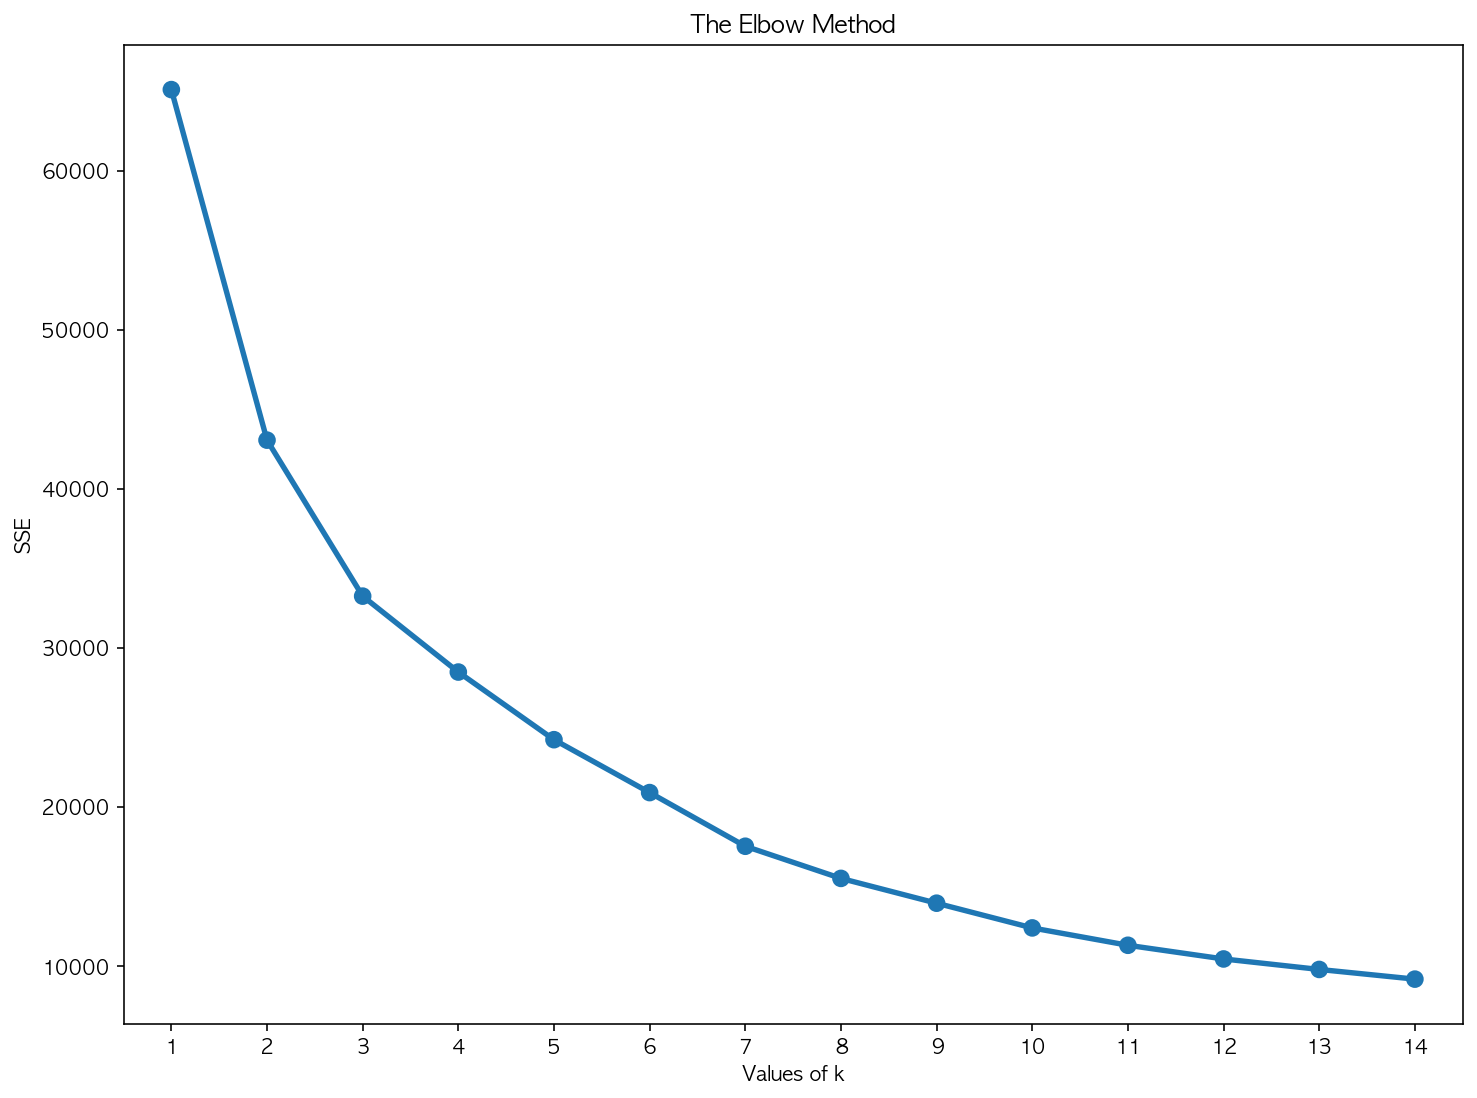

In [78]:
# 결과 시각화

plt.figure(figsize=(12, 9))
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [79]:
# 기울기를 고려할 때, 7개의 군집으로 나누는 것이 적당할 것으로 판단됨. 

In [80]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=7, max_iter=50, random_state=42)
kmeans.fit(Z)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

k7 = final_df.assign(Cluster = cluster_labels)

In [81]:
k7

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Top_Selling,Cluster
0,Candace_Kane's_Candy_Factory,DS,2008,Action,0.04,0.00,0.00,0.00,0.04,0,0
1,The_Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01,0.18,0,0
2,Otome_wa_Oanesama_Boku_ni_Koi_Shiteru_Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00,0.02,0,0
3,Deal_or_No_Deal:_Special_Edition,DS,2010,Misc,0.04,0.00,0.00,0.00,0.04,0,0
4,Ben_10_Ultimate_Alien:_Cosmic_Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16268,Ice_Age_2:_The_Meltdown,GC,2006,Platform,0.15,0.04,0.00,0.01,0.20,0,0
16269,Rainbow_Islands:_Revolution,PSP,2005,Action,0.01,0.00,0.00,0.00,0.01,0,0
16270,NBA_2K16,PS3,2015,Sports,0.44,0.19,0.03,0.13,0.79,0,0
16271,Toukiden:_The_Age_of_Demons,PSV,2013,Action,0.05,0.05,0.25,0.03,0.38,0,0


In [82]:
k7["Cluster"].value_counts()

0    14571
4     1278
3      257
1      138
6       26
2        2
5        1
Name: Cluster, dtype: int64

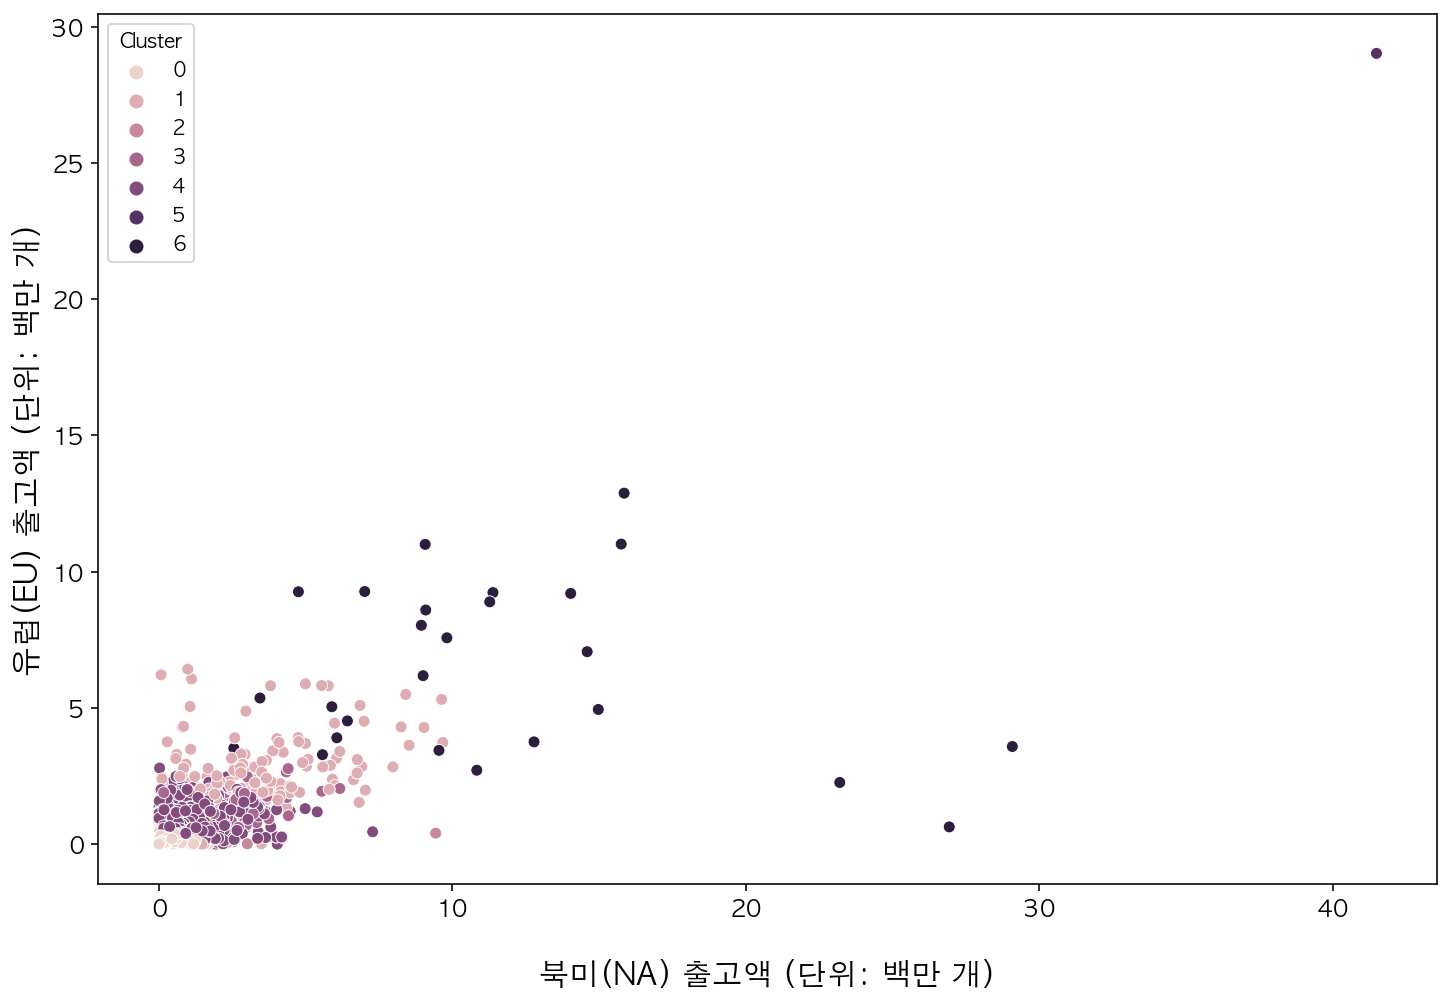

In [83]:
# 군집화 결과 시각화 
plt.figure(figsize=(12, 8))
sns_k7 = sns.scatterplot(x=k7.NA_Sales, y=k7.EU_Sales, hue=k7.Cluster)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("북미(NA) 출고액 (단위: 백만 개)", fontsize=15, labelpad=20)
plt.ylabel("유럽(EU) 출고액 (단위: 백만 개)", fontsize=15)
plt.show()

fig = sns_k7.get_figure()
fig.savefig("s1_k7.pdf") # pdf로 저장

In [84]:
# 클러스터별 전세계 출고액 평균 
k7["Total_Sales"].groupby(k7["Cluster"]).agg(['mean', 'min', 'max'])

,mean,min,max
Cluster,,,
0,0.244772,0.00,1.93
1,7.481957,2.28,16.38
2,16.230000,11.65,20.81
3,2.930156,0.86,11.90
4,2.098740,0.54,7.81
5,82.740000,82.74,82.74
6,23.609231,12.28,40.24


In [85]:
k7[sales].agg(['mean', 'min', 'max'])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
mean,0.265013,0.147238,0.078128,0.048144
min,0.000000,0.000000,0.000000,0.000000
max,41.490000,29.020000,10.220000,10.570000


In [86]:
# 클러스터별 지역별 출고액 평균, 최소값, 최대값 
k7[sales].groupby(k7["Cluster"]).agg(['mean', 'min', 'max'])

NA_Sales                 EU_Sales                JP_Sales        \
              mean    min    max       mean    min    max      mean   min   
Cluster                                                                     
0         0.127317   0.00   1.67   0.057209   0.00   0.90  0.041602  0.00   
1         3.373188   0.05   9.67   2.693768   0.00   6.42  0.446884  0.00   
2         6.220000   3.01   9.43   0.205000   0.01   0.40  0.755000  0.41   
3         0.891206   0.00   6.16   0.427782   0.00   2.77  1.508288  0.75   
4         1.104186   0.00   7.28   0.693427   0.00   2.79  0.078803  0.00   
5        41.490000  41.49  41.49  29.020000  29.02  29.02  3.770000  3.77   
6        11.453846   2.55  29.08   6.350000   0.63  12.88  4.226538  0.24   

               Other_Sales               
           max        mean   min    max  
Cluster                                  
0         0.83    0.018645  0.00   0.39  
1         3.08    0.968116  0.00   2.93  
2         1.10    9.050000  7.53  10.57  
3         4.87    0.102879  0.00   0.96  
4         0.92    0.222324  0.00   1.41  
5         3.77    8.460000  8.46   8.46  
6        10.22    1.578846  0.42   4.14

In [88]:
k7["Year"].groupby(k7["Cluster"]).agg(['mean', 'min', 'max'])

,mean,min,max
Cluster,,,
0,2006.536820,1980,2016
1,2008.166667,1986,2016
2,2004.000000,2004,2004
3,1998.824903,1983,2016
4,2006.338811,1980,2016
5,2006.000000,2006,2006
6,2001.461538,1984,2013


In [89]:
pd.crosstab(k7["Genre"], k7["Cluster"]).apply(lambda r: (r/r.sum())*100, axis=0)

Cluster,0,1,2,3,4,5,6
Genre,,,,,,,
Action,19.868231,23.188406,50.0,9.338521,22.535211,0.0,3.846154
Adventure,8.496328,1.449275,0.0,1.556420,2.034429,0.0,0.000000
Fighting,5.057992,0.724638,0.0,5.447471,6.494523,0.0,0.000000
Misc,10.678745,7.971014,0.0,8.560311,8.841941,0.0,11.538462
Platform,4.934459,8.695652,0.0,13.618677,7.981221,0.0,23.076923
...,...,...,...,...,...,...,...
Role-Playing,8.860065,5.797101,0.0,31.128405,6.181534,0.0,23.076923
Shooter,7.357079,26.086957,0.0,2.334630,12.910798,0.0,3.846154
Simulation,5.270743,1.449275,0.0,7.003891,4.538341,0.0,7.692308


In [90]:
pd.crosstab(k7["Platform"], k7["Cluster"]).apply(lambda r: (r/r.sum())*100, axis=0)

Cluster,0,1,2,3,4,5,6
Platform,,,,,,,
3DO,0.020589,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3DS,3.170681,2.898551,0.0,7.782101,1.017214,0.0,0.000000
Atari_2600,0.727472,0.000000,0.0,0.000000,0.704225,0.0,0.000000
DC,0.343147,0.000000,0.0,0.000000,0.156495,0.0,0.000000
DS,13.808249,5.072464,0.0,11.284047,5.633803,0.0,30.769231
...,...,...,...,...,...,...,...
Wii,7.919841,9.420290,0.0,1.945525,8.215962,100.0,23.076923
WiiU,0.878457,0.724638,0.0,1.556420,0.782473,0.0,0.000000
X360,7.110013,18.840580,0.0,0.000000,13.223787,0.0,3.846154


In [91]:
pd.crosstab(k7["Year"], k7["Cluster"]).apply(lambda r: (r/r.sum())*100, axis=0)

Cluster,0,1,2,3,4,5,6
Year,,,,,,,
1980,0.041178,0.000000,0.0,0.000000,0.156495,0.0,0.000000
1981,0.281381,0.000000,0.0,0.000000,0.391236,0.0,0.000000
1982,0.233340,0.000000,0.0,0.000000,0.156495,0.0,0.000000
1983,0.089218,0.000000,0.0,1.556420,0.000000,0.0,0.000000
1984,0.027452,0.000000,0.0,3.501946,0.000000,0.0,3.846154
...,...,...,...,...,...,...,...
2012,4.001098,6.521739,0.0,2.723735,4.303599,0.0,0.000000
2013,3.177544,5.072464,0.0,2.723735,5.242567,0.0,3.846154
2014,3.458925,8.695652,0.0,2.334630,4.694836,0.0,0.000000


# 분석결과 요약 및 제언

## 분석결과 요약

1. 연도별 비디오 게임 트렌드
   - 비디오 게임의 쇠퇴 경향 확인, 모바일 게임에 대한 이해 필요 
   - 북미 → 일본 → 유럽 
   - 플랫폼 다변화: Arita 2600 → 닌텐도 DS, Wii 강세 
2. 지역별 선호 비디오 게임 장르: ‘Action’, 일본 ’Role-Playing’
   - 지역별 다른 접근 필요 
3. 출고량 높은 비디오 게임
   - 상위 1% 게임: 평균 출고량: 1,136만 개, 점유율 21.1%, ‘Shooter’, ‘X360’
4. 비디오 게임 군집화: 7개 군집으로 구분 
   - 데이터 보강을 통해 군집별 특성에 대한 추가 분석 필요 

## 제언: 단기 및 중장기 전략

* 다음 분기 비디오 게임 출시 전략 제언: 닌텐도 기반의 액션 게임으로, 성장 중인 유럽 시장 집중 공략 필요 
* 중장기적 전략: 모바일 게임 시장 분석 및 확대 필요   